<a href="https://colab.research.google.com/github/Car1487/Curso.Prep.Henry/blob/master/R2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SCRIPT DOS SANTOS     DICIEMBRE 2023


# **Paquetes necesarios**

In [ ]:
#install.packages("ggExtra")
#install.packages("readr")
#install.packages("nlme")
#install.packages("dplyr")
#install.packages("rJava", type = "source")
#install.packages("xlsxjars", type = "source")
#install.packages("openxlsx")
#install.packages("gridExtra")
#install.packages("lmtest")
install.packages("car")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(readr)
library(nlme)
library(dplyr)
library(ggplot2)
library(openxlsx)
library(ggExtra)
library(tidyr)
library(lmtest)
library(car)
#library(ggMarginal)
#library(gridExtra)
#pdf("DrogasyAlcohol.pdf")
# Cerrar el archivo PDF
#dev.off()

# **Curva Gompertz**

Como afectan los parametros A,B y C el modelo Gompertz

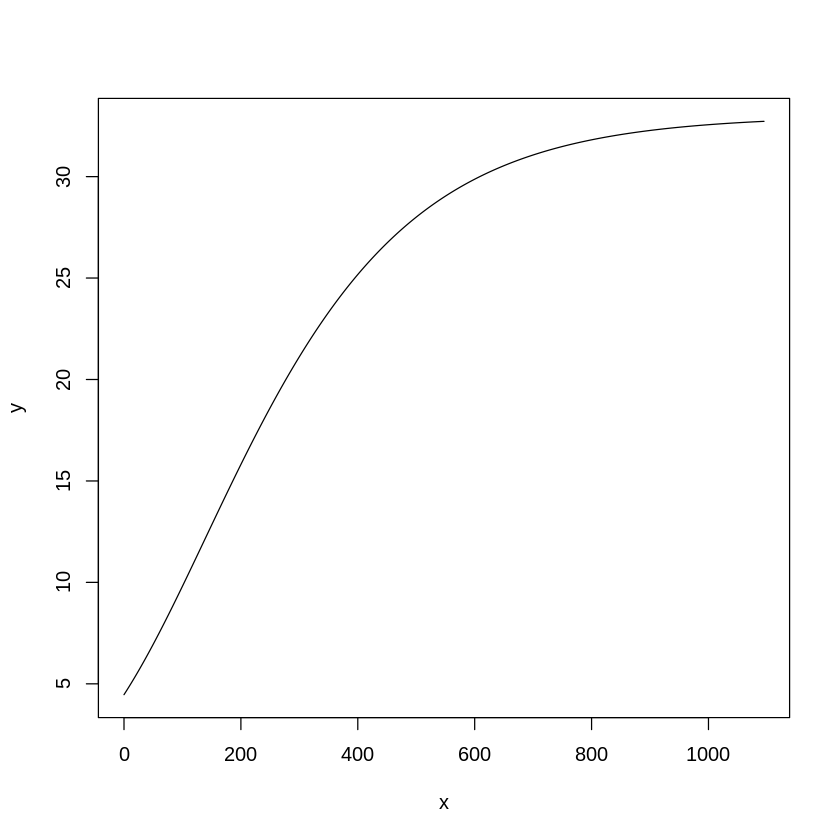

In [ ]:
gompertz <- function(x, a = 33, b = 2, c = 0.005) {
               a * exp(-b * exp(-c * x))
            }
x <- seq(0, 365*3)
y <- gompertz(x)
plot(x, y, type = "l")

# **Estimación de la curva de crecimiento por medio del modelo de Gompertz**

## **Cargar Archivo**


In [ ]:
#siguiendo video https://www.youtube.com/watch?v=eGSVcrkd6yU
#library(nlme)
#partos <- read.csv("partoscsv.csv", sep = ",")
# Asegúrate de usar el delimitador correcto (;) al leer el archivo CSV
partos <- read.csv("partoscsv.csv",sep=";")

partos$id=as.factor(partos$id)
partos$sx=as.factor(partos$sx)
partos$tp=as.factor(partos$tp)
partos$a=as.factor(partos$a)
partos$ep=as.factor(partos$ep)
partos$ed=as.factor(partos$ed)
# Excluir filas con valores no finitos
partos <- partos[is.finite(partos$dias) & is.finite(partos$peso), ]

In [ ]:
head(partos) # ver los datos

,id,sx,tp,ep,a,ed,dias,peso
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>
1,1,2,1,V,17,8d,1,4.0
2,1,2,1,V,17,8d,8,4.2
3,1,2,1,V,17,8d,15,5.2
4,1,2,1,V,17,8d,22,6.7
5,1,2,1,V,17,8d,29,8.1
6,1,2,1,V,17,8d,35,9.6


## **Descriptiva de los datos crudos**

In [ ]:
# Descriptiva de los datos (P/inidicar en que rango estamos haciendo las estimaciones))
summary(partos)
str(partos)

       id       sx       tp       ep        a         ed            dias       
 5      : 159   1: 315   1:1028   I: 850   17:1370   8d:2220   Min.   :   1.0  
 8      : 158   2:1905   2:1192   V:1370   18: 850             1st Qu.: 200.0  
 7      : 157                                                  Median : 396.0  
 4      : 156                                                  Mean   : 445.9  
 3      : 147                                                  3rd Qu.: 638.0  
 2      : 144                                                  Max.   :1318.0  
 (Other):1299                                                                  
      peso      
 Min.   : 1.71  
 1st Qu.:14.98  
 Median :22.91  
 Mean   :22.39  
 3rd Qu.:29.28  
 Max.   :49.82  
                

'data.frame':	2220 obs. of  8 variables:
 $ id  : Factor w/ 20 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ sx  : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ tp  : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ ep  : Factor w/ 2 levels "I","V": 2 2 2 2 2 2 2 2 2 2 ...
 $ a   : Factor w/ 2 levels "17","18": 1 1 1 1 1 1 1 1 1 1 ...
 $ ed  : Factor w/ 1 level "8d": 1 1 1 1 1 1 1 1 1 1 ...
 $ dias: int  1 8 15 22 29 35 43 49 56 64 ...
 $ peso: num  4 4.2 5.2 6.7 8.1 9.6 10.5 11.5 12.2 12.5 ...


# **Grupo de Datos**
Agrupar datos por id

In [ ]:
gd = groupedData(peso ~ dias | id, data = partos)
str(gd)

Classes ‘nfnGroupedData’, ‘nfGroupedData’, ‘groupedData’ and 'data.frame':	2220 obs. of  8 variables:
 $ id  : Ord.factor w/ 20 levels "13"<"1"<"10"<..: 2 2 2 2 2 2 2 2 2 2 ...
 $ sx  : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ tp  : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ ep  : Factor w/ 2 levels "I","V": 2 2 2 2 2 2 2 2 2 2 ...
 $ a   : Factor w/ 2 levels "17","18": 1 1 1 1 1 1 1 1 1 1 ...
 $ ed  : Factor w/ 1 level "8d": 1 1 1 1 1 1 1 1 1 1 ...
 $ dias: int  1 8 15 22 29 35 43 49 56 64 ...
 $ peso: num  4 4.2 5.2 6.7 8.1 9.6 10.5 11.5 12.2 12.5 ...
 - attr(*, "formula")=Class 'formula'  language peso ~ dias | id
  .. ..- attr(*, ".Environment")=<environment: R_GlobalEnv> 
 - attr(*, "FUN")=function (x)  
 - attr(*, "order.groups")= logi TRUE


# **Graficos de Curvas**

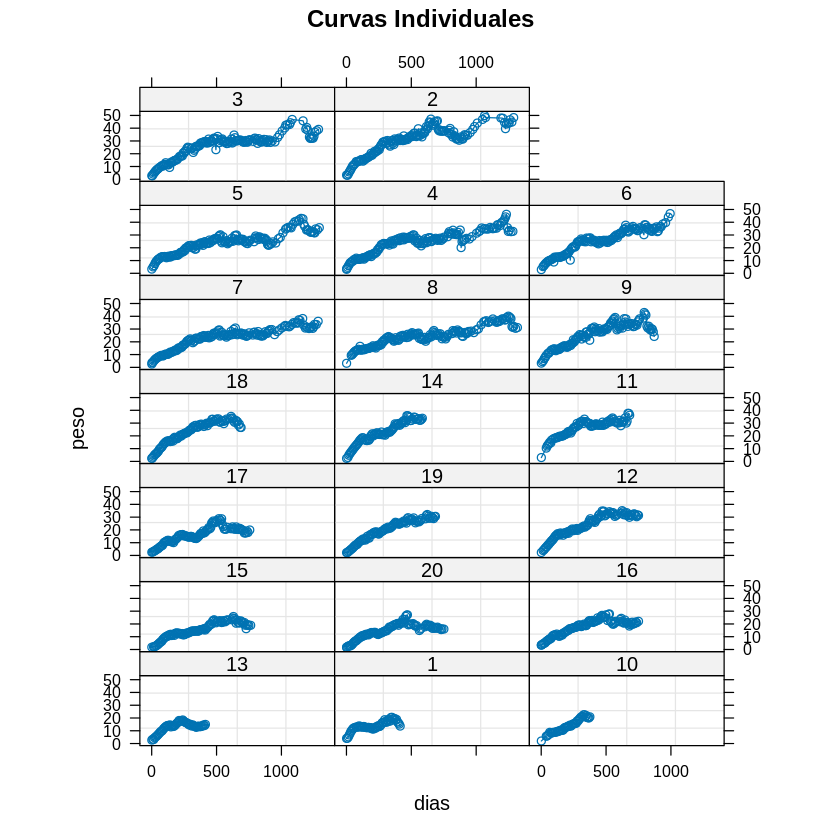

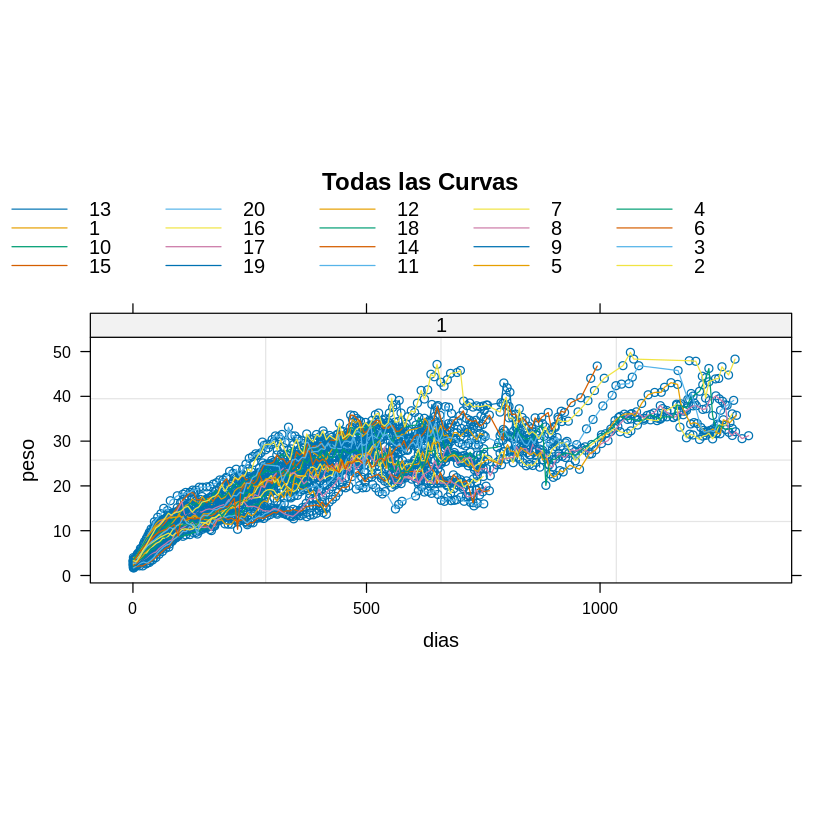

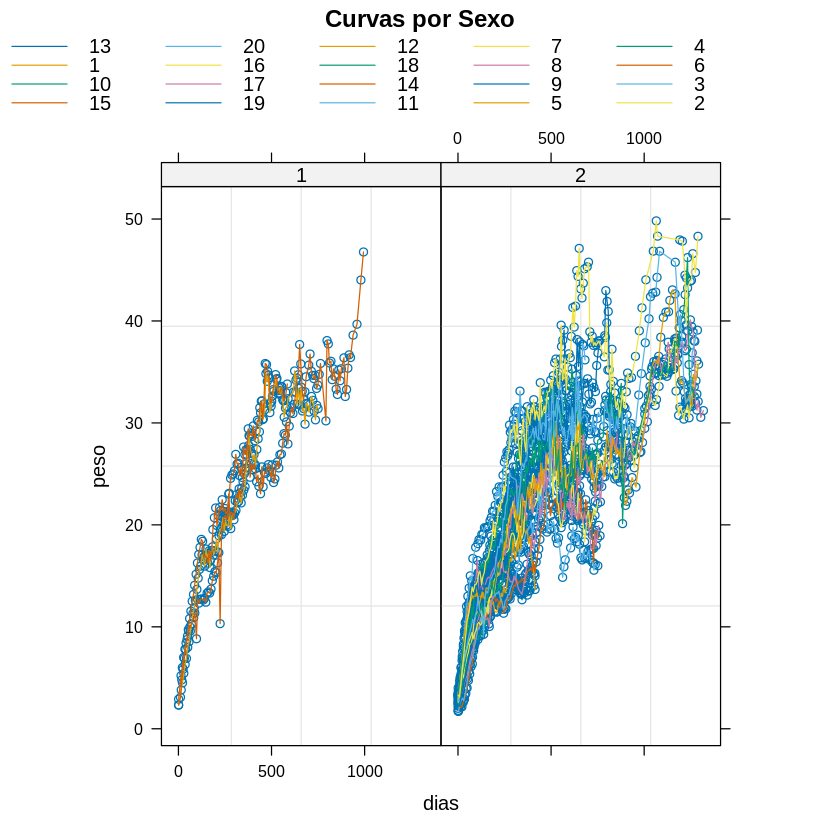

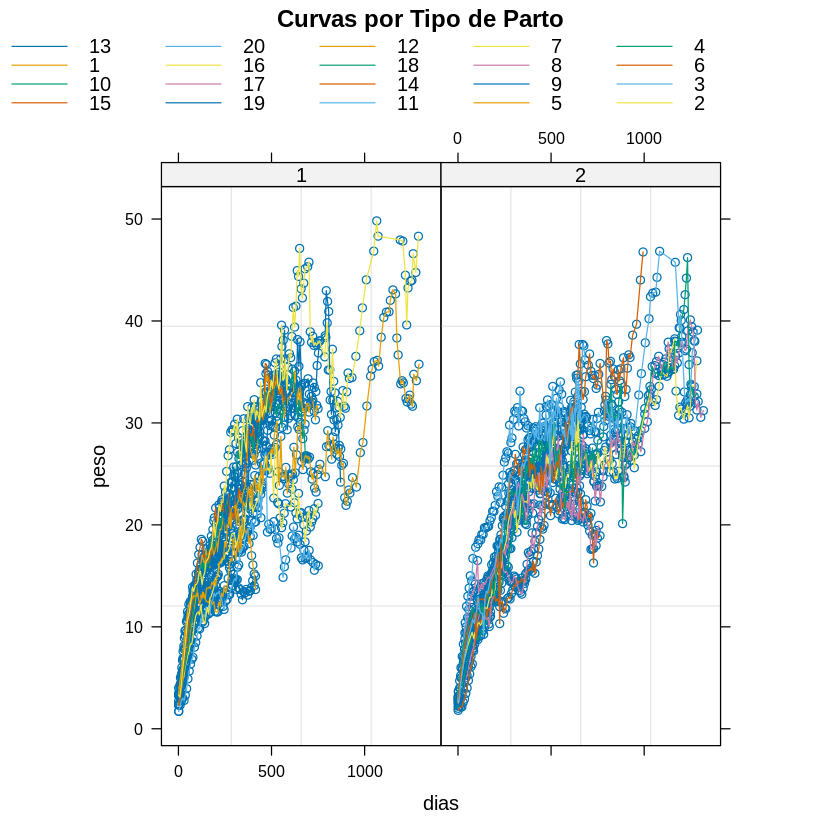

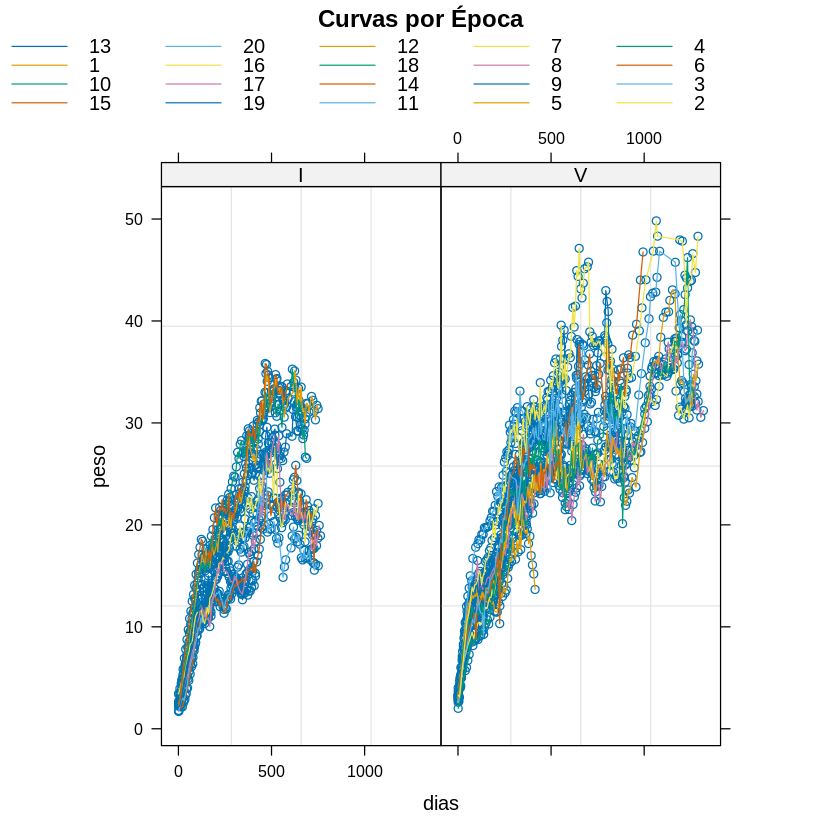

In [ ]:
# Plot de curvas individuales
plot(gd, main = "Curvas Individuales")

# Todas las curvas en un gráfico
plot(gd, outer = ~1, main = "Todas las Curvas")

# Curvas por sexo
plot(gd, outer = ~ sx, aspect = 2, main = "Curvas por Sexo")

# Curvas por Tipo de Parto
plot(gd, outer = ~ tp, aspect = 2, main = "Curvas por Tipo de Parto")

# Curvas por Época
plot(gd, outer = ~ ep, aspect = 2, main = "Curvas por Época")


# **MODELO DE GOMPERTZ**

In [ ]:
# MODELO
Gompertz = nlme(peso ~ A * exp(-B * exp(-C * dias)),
           fixed = c(A ~ 1, B ~ 1, C ~ 1),
           random = A + B + C ~ 1, #otra forma de notarlo
           data = gd,
           start = c(A = 50, B = 4, C = 0.06), # Valores iniciales para los parámetros
           na.action = na.exclude) # Tratamiento de datos faltantes
print(Gompertz)

Nonlinear mixed-effects model fit by maximum likelihood
  Model: peso ~ A * exp(-B * exp(-C * dias)) 
  Data: gd 
  Log-likelihood: -5403.294
  Fixed: c(A ~ 1, B ~ 1, C ~ 1) 
           A            B            C 
32.145391668  1.741958817  0.005379432 

Random effects:
 Formula: list(A ~ 1, B ~ 1, C ~ 1)
 Level: id
 Structure: General positive-definite, Log-Cholesky parametrization
         StdDev     Corr         
A        7.86755205 A      B     
B        0.22621607 -0.461       
C        0.00297053 -0.789  0.422
Residual 2.62678477              

Number of Observations: 2220
Number of Groups: 20 


información proporcionada sobre los coeficientes aleatorios en la salida del modelo:

1. **StdDev (Desviación Estándar)**:
   - La desviación estándar (StdDev) indica la variabilidad entre los diferentes grupos o unidades de observación en relación con el efecto del coeficiente correspondiente.
   - Por ejemplo, para el coeficiente \( A \), la desviación estándar es de aproximadamente 7.87. Esto significa que hay una variabilidad considerable entre los grupos en cuanto al efecto de \( A \) en la variable de respuesta.

2. **Correlaciones**:
   - Las correlaciones muestran cómo están relacionados los coeficientes aleatorios entre sí. En este caso, la correlación se presenta como una matriz donde cada entrada representa la correlación entre dos coeficientes.
   - Por ejemplo, la correlación entre los coeficientes aleatorios de \( A \) y \( B \) es de aproximadamente -0.461. Esto indica que hay una relación negativa moderada entre los efectos aleatorios de \( A \) y \( B \). Es decir, cuando el efecto aleatorio de \( A \) es grande en un grupo, tiende a estar asociado con un efecto aleatorio más pequeño de \( B \) en el mismo grupo, y viceversa.
   - De manera similar, la correlación entre los coeficientes aleatorios de \( A \) y \( C \) es de aproximadamente -0.789, mientras que la correlación entre los coeficientes aleatorios de \( B \) y \( C \) es de aproximadamente 0.422.

3. **Residual (Residual)**:
   - El término "Residual" indica la variabilidad no explicada por el modelo, es decir, la diferencia entre los datos observados y los predichos por el modelo.
   - En este caso, la desviación estándar del residual es de aproximadamente 2.63, lo que indica la magnitud promedio de la discrepancia entre los datos observados y los valores predichos por el modelo después de tener en cuenta los efectos fijos y aleatorios.

En resumen, la salida proporciona información sobre la variabilidad entre grupos en relación con los efectos de los coeficientes aleatorios, así como sobre las relaciones entre los coeficientes aleatorios. Esto permite comprender cómo varían los efectos del modelo entre diferentes grupos o unidades de observación.

In [ ]:
summary(Gompertz) # ademas de los parametros fijos y aleatorios, calcula el AIC y BIC

Nonlinear mixed-effects model fit by maximum likelihood
  Model: peso ~ A * exp(-B * exp(-C * dias)) 
  Data: gd 
       AIC      BIC    logLik
  10826.59 10883.64 -5403.294

Random effects:
 Formula: list(A ~ 1, B ~ 1, C ~ 1)
 Level: id
 Structure: General positive-definite, Log-Cholesky parametrization
         StdDev     Corr         
A        7.86755205 A      B     
B        0.22621607 -0.461       
C        0.00297053 -0.789  0.422
Residual 2.62678477              

Fixed effects:  c(A ~ 1, B ~ 1, C ~ 1) 
     Value Std.Error   DF   t-value p-value
A 32.14539 1.8117761 2198 17.742475       0
B  1.74196 0.0581446 2198 29.959065       0
C  0.00538 0.0006801 2198  7.909624       0
 Correlation: 
  A      B     
B -0.373       
C -0.773  0.413

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-4.58221223 -0.57422928 -0.07676593  0.53840605  4.86646960 

Number of Observations: 2220
Number of Groups: 20 

Esta salida corresponde a un modelo mixto de efectos no lineales ajustado a los datos.
**Modelo y Ajuste del Modelo:**
*Modelo:* El modelo utilizado es una función no lineal de tres parámetros, específicamente el modelo de curva de crecimiento que sigue la forma peso ~ A * exp(-B * exp(-C * dias)), donde A,B y C son los parametros del modelo y dias es la variable independiente.
*Ajuste del Modelo:* El ajuste del modelo se realiza utilizando el método de máxima verosimilitud (maximum likelihood). El objetivo es encontrar los valores de los parámetros A, B y C que maximizan la probabilidad de observar los datos que se han registrado.La log-verosimilitud (-5403.294) puede considerarse como una medida de la bondad del ajuste. Cuanto más cercano sea este valor a cero, mejor será el ajuste del modelo a los datos.

## **Parámetros Fijos y Aleatorios**

### **Coeficientes Fijos**
Los coeficientes fijos representan la relación promedio entre las variables predictoras y la variable de respuesta en toda la población.
Estos coeficientes se estiman utilizando el método de máxima

In [ ]:
# Coeficientes Fijos
Af <- Gompertz$coeff$fixed[1]  # parámetro general A
Bf <- Gompertz$coeff$fixed[2]  # parámetro general B
Cf <- Gompertz$coeff$fixed[3]  # parámetro general C

### **Coeficientes Aleatorios**
Los coeficientes aleatorios representan la variabilidad en los efectos de las unidades de observación que no se pueden explicar mediante los coeficientes fijos.Estos coeficientes se consideran variables aleatorias y se les asigna una distribución de probabilidad.
Los coeficientes aleatorios permiten modelar la heterogeneidad entre las unidades de observación, como las diferencias individuales entre sujetos, grupos o sitios de muestreo.
La inclusión de coeficientes aleatorios en un modelo de efectos mixtos permite capturar la estructura de correlación entre las observaciones repetidas dentro de las mismas unidades (por ejemplo, sujetos o grupos).
En este modelo, hay coeficientes aleatorios para A, B, y C, que capturan la variabilidad entre las unidades de observación (denotadas por el nivel "id").
Los coeficientes aleatorios se modelan utilizando una estructura de correlación específica. En este caso, se utiliza una estructura general positiva definida con parametrización log-Cholesky.

In [ ]:
# Coeficientes Aleatorios
ABCr <- Gompertz$coeff$random$id   # parametros por animal

#Ordenar
ABCr <- ABCr[order(as.numeric(row.names(ABCr))),,drop = F]

df2 <- as.data.frame(ABCr)
df2$id <- 1:nrow(df2)
df2$A<-df2$A+Af
df2$B<-df2$B+Bf
df2$C<-df2$C+Cf
df2 <- subset(df2, select = c("id","A","B","C"))
head(df2)

#Crear variables n y pseudodias
n <- nrow(ABCr)
pseudodias <- seq(0, 1200)

,id,A,B,C
,<int>,<dbl>,<dbl>,<dbl>
1,1,40.02913,1.550025,0.001789595
2,2,40.90579,1.805107,0.004765887
3,3,34.34508,1.871840,0.004989017
4,4,35.29113,1.495735,0.003142065
5,5,35.94619,1.333219,0.002383860
6,6,39.48130,1.712967,0.003344332


##**ANÁLISIS DE AJUSTES DEL MODELO**

## **Índices más utilizados para seleccionar el modelo de mejor ajuste (EN TESIS)**
1. Error cuadrático medio (ECM),
2. Coeficiente de determinación (R2),
3. Desviación media absoluta (DMA),
4. Porcentaje de convergencia (%C)
5. Rango de convergencia (RC),
6. Análisis gráfico del modelo,
7. Cumplimiento de supuestos de análisis (variables independientes con expectativa cero y residuales de varianza constante)
8. Simplicidad del modelo

### **SUPUESTOS DEL MODELO**

1. Prueba de normalidad de los residuos:


	Shapiro-Wilk normality test

data:  residuos
W = 0.97428, p-value < 2.2e-16


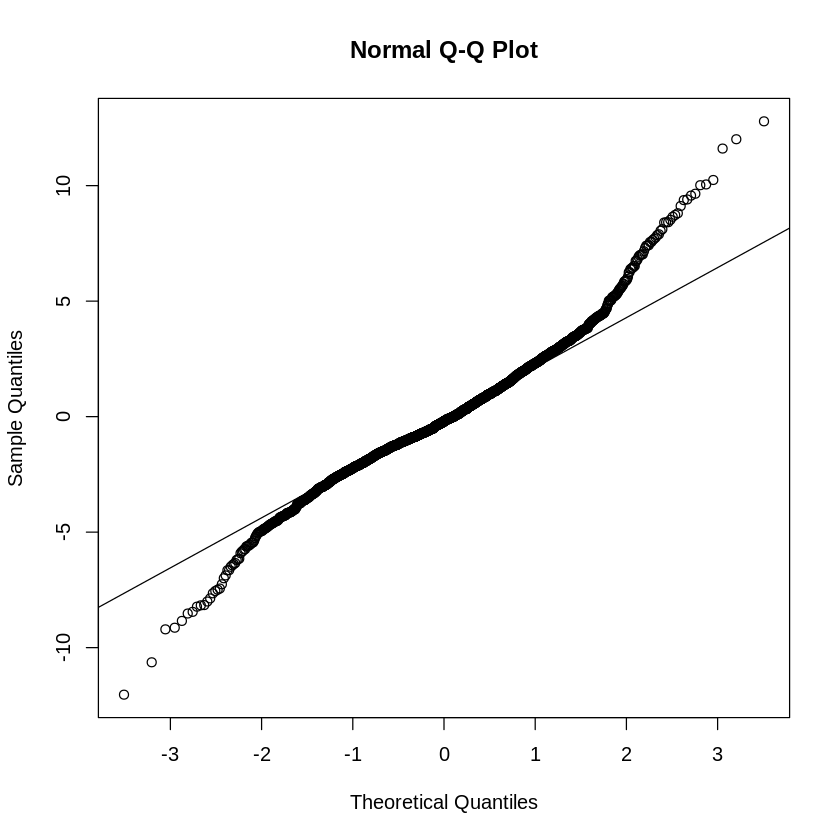

In [ ]:
# Cálculo de los residuos del modelo
residuos <- residuals(Gompertz)

# Prueba de normalidad de los residuos
shapiro.test(residuos)

# Gráfico de QQ para visualizar la normalidad de los residuos
qqnorm(residuos)    #qqnorm(Gompertz,abline = c(0,1)) # QQ plot)
qqline(residuos)



SHAPIRO. El resultado de la prueba de normalidad de Shapiro-Wilk indica un valor de estadística de prueba (W) de aproximadamente 0.97428 y un valor p muy pequeño (p < 2.2e-16). Esto sugiere que hay evidencia significativa para rechazar la hipótesis nula de normalidad de los residuos. En otras palabras, los residuos no siguen una distribución normal. Esto podría indicar que el modelo Gompertz podría no ser la mejor elección para estos datos, o podría sugerir que hay aspectos no capturados por el modelo que podrían ser explorados. Es importante tener en cuenta este hallazgo al interpretar los resultados del modelo y considerar posibles ajustes o transformaciones adicionales.

QQPLOT.Cuando los valores en el extremo inferior izquierdo del gráfico QQ plot están por debajo de la línea y los valores en el lado superior derecho están por encima, sugiere que hay una cola pesada en la distribución de los residuos. Esto indica que los residuos tienen una distribución más sesgada hacia valores extremadamente bajos de lo que se esperaría bajo una distribución normal. Mientras que en el lado superior derecho, los valores de los residuos tienden a ser más grandes de lo esperado bajo una distribución normal.

En resumen, este patrón en el QQ plot, junto con el resultado significativo de la prueba de normalidad de Shapiro-Wilk, respalda la conclusión de que los residuos no siguen una distribución normal. Esta falta de normalidad podría indicar que el modelo Gompertz podría no ajustarse adecuadamente a los datos o que podría haber otras características en los datos que no están siendo capturadas por el modelo. Es importante tener en cuenta esta falta de normalidad al interpretar los resultados del modelo y considerar posibles ajustes adicionales.

2. PRUEBA DE HOMOCEDASTICIDAD DE LA VARIANZA


	studentized Breusch-Pagan test

data:  residuos ~ fitted(Gompertz)
BP = 198.36, df = 1, p-value < 2.2e-16


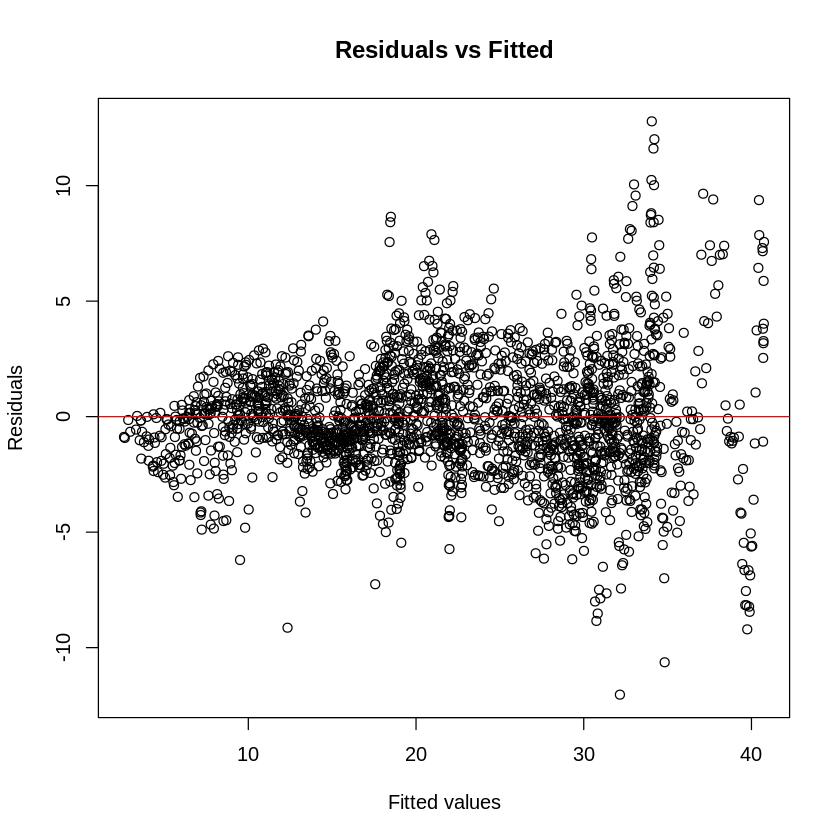

In [ ]:
# Gráfico de dispersión de residuos vs. valores ajustados
plot(fitted(Gompertz), residuos, main="Residuals vs Fitted", xlab="Fitted values", ylab="Residuals")
abline(h=0, col="red")

# Prueba de Breusch-Pagan para la homocedasticidad
library(lmtest)
bptest(residuos ~ fitted(Gompertz))


RESIDUAL VS FITTED. Una gráfica residual vs. ajustado en forma de cono, con una dispersión estrecha en el extremo izquierdo y una dispersión más amplia en el extremo derecho, sugiere heterocedasticidad, es decir, que la variabilidad de los errores aumenta o disminuye con los valores ajustados.

En este caso, la dispersión estrecha en el extremo izquierdo indica que los residuos tienen una varianza relativamente constante o menor cuando los valores ajustados son bajos. Sin embargo, la dispersión más amplia en el extremo derecho sugiere que la varianza de los residuos aumenta a medida que los valores ajustados aumentan.

Este patrón de dispersión heterocedástica en la gráfica residual vs. ajustado es consistente con el resultado de la prueba de Breusch-Pagan, que indicó evidencia significativa de heterocedasticidad en los residuos del modelo.

Cuando se observa esta forma de cono en la gráfica residual vs. ajustado, puede ser útil considerar métodos alternativos de modelado que puedan abordar la heterocedasticidad, como la transformación de los datos o el uso de modelos de regresión robustos que sean menos sensibles a la heterocedasticidad.

Breusch-Pagan test. El resultado de la prueba de Breusch-Pagan indica un valor de estadística de prueba (BP) de aproximadamente 198.36 con 1 grado de libertad y un valor p muy pequeño (p < 2.2e-16). Esto sugiere que hay evidencia significativa para rechazar la hipótesis nula de homocedasticidad de los residuos. En otras palabras, los residuos no tienen una varianza constante en todas las combinaciones de niveles de las variables explicativas. Esto podría indicar que el modelo Gompertz podría no ser el más adecuado para estos datos o que podría haber otros aspectos no capturados por el modelo que podrían ser explorados. Es importante tener en cuenta este hallazgo al interpretar los resultados del modelo y considerar posibles ajustes adicionales.

3. Prueba de independencia de los residuos:

[1] 0.3699033

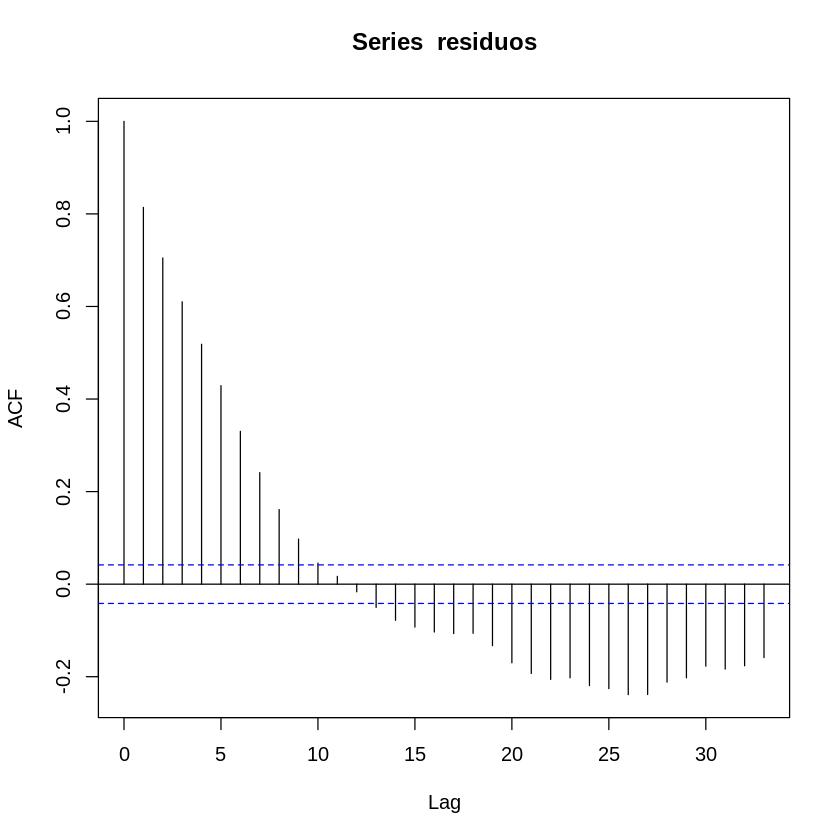

In [ ]:
# Gráfico de autocorrelación de los residuos
acf(residuos)

# Prueba de Durbin-Watson para la autocorrelación de los residuos

# Transformar los residuos en un vector
residuos_vector <- as.vector(residuos)

# Realizar la prueba de Durbin-Watson
durbinWatsonTest(residuos_vector)


**Durbin-Watson**. Un resultado del estadístico de Durbin-Watson de 0.3699 sugiere una posible autocorrelación positiva entre los residuos del modelo.

El estadístico de Durbin-Watson oscila entre 0 y 4. Un valor cercano a 0 indica autocorrelación positiva, mientras que un valor cercano a 4 indica autocorrelación negativa. Un valor cercano a 2 indica que no hay autocorrelación.

Dado que tu resultado está más cerca de 0 que de 2, indica una autocorrelación positiva en los residuos del modelo. Esto sugiere que hay algún patrón sistemático de dependencia entre los residuos adyacentes, lo cual podría indicar que el modelo no está capturando completamente toda la información relevante en los datos.

Es importante considerar la autocorrelación al interpretar los resultados del modelo y puede ser necesario investigar más a fondo la causa de esta autocorrelación para realizar ajustes o mejoras en el modelo.

GRAFICO SERIE DE RESIDUOS. El hecho de que observes un valor igual a 1 en el gráfico de autocorrelación de los residuos y luego una disminución gradual hasta llegar a cero sugiere una fuerte autocorrelación en los residuos del modelo. Esto significa que los residuos en un momento dado están fuertemente correlacionados con los residuos en momentos anteriores o posteriores.

La forma de campana de Gauss por debajo de cero indica que la autocorrelación decae gradualmente a medida que aumenta el desfase entre los datos, lo cual es común en procesos estocásticos bien comportados.

Dado que la autocorrelación es evidente en el gráfico y el valor del estadístico de Durbin-Watson es bajo, esto respalda la presencia de autocorrelación positiva en los residuos del modelo. Es importante tener en cuenta esta autocorrelación al interpretar los resultados del modelo y puede ser necesario ajustar el modelo o considerar métodos alternativos para abordar esta autocorrelación.

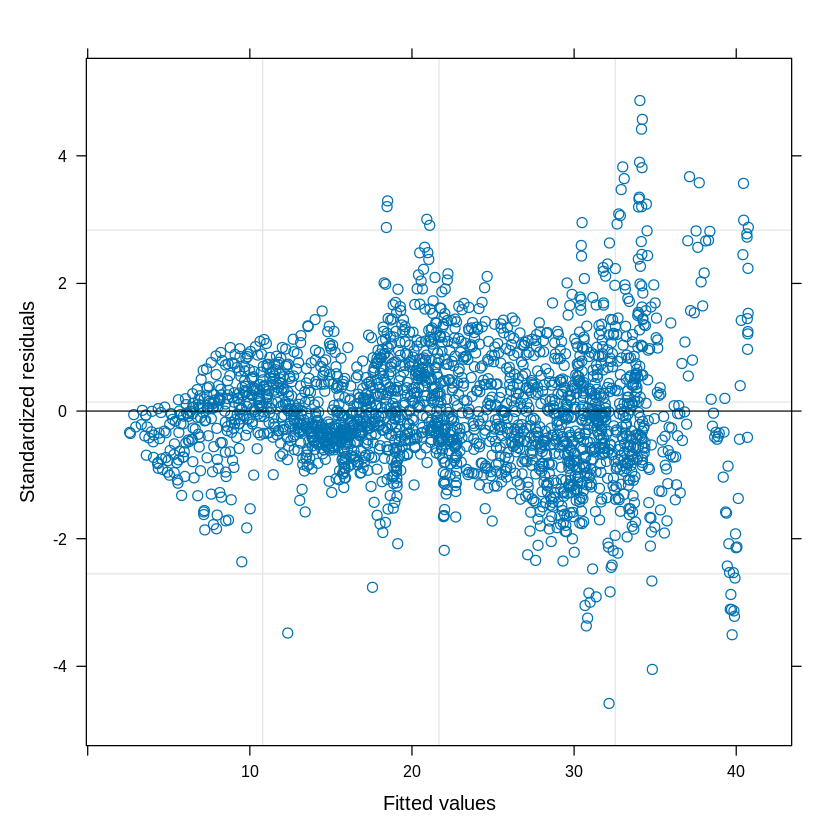

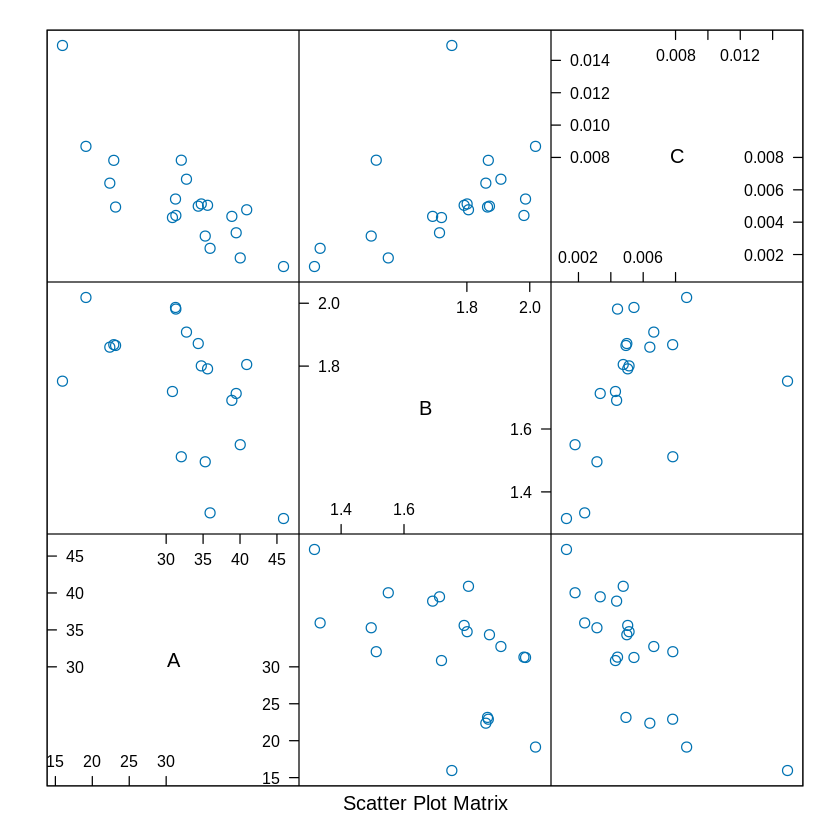

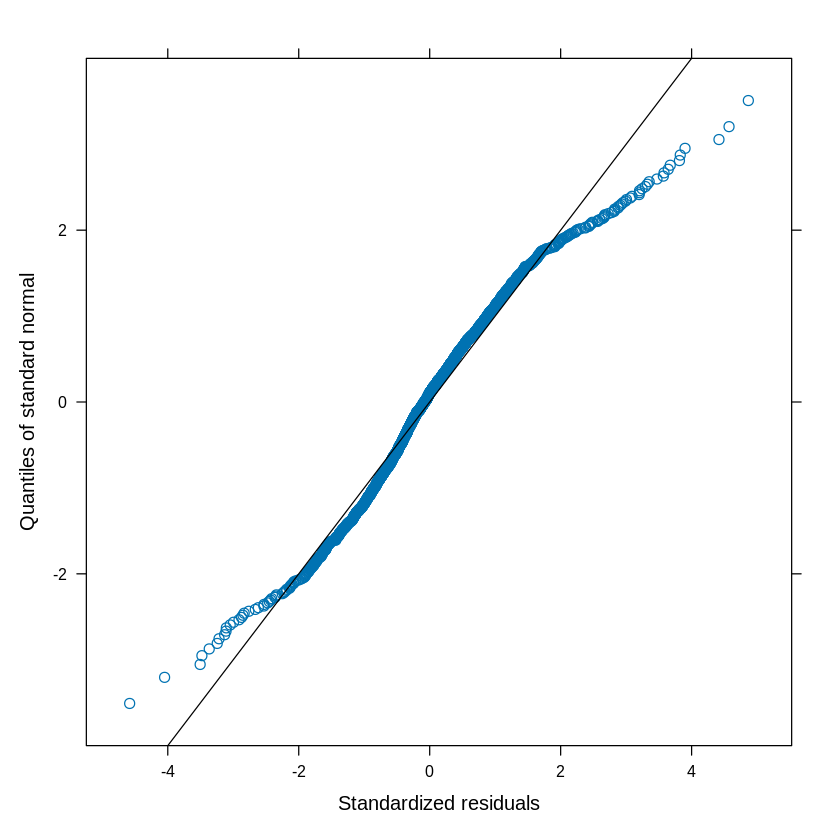

In [ ]:
#supuestos del modelo (GRAFICOS)
plot(Gompertz)
pairs( Gompertz )
qqnorm(Gompertz,abline = c(0,1)) # QQ plot)

En el contexto de un modelo estadístico, los términos "observados", "ajustados" y "residuos" se refieren a diferentes aspectos de la relación entre el modelo y los datos observados:

1. **Observados (o datos observados)**: Estos son los valores reales de la variable dependiente que se han medido o registrado en el estudio. Son los datos que tienes disponibles para analizar y sobre los cuales estás construyendo tu modelo estadístico.

2. **Ajustados (o valores ajustados)**: Estos son los valores que el modelo predice para la variable dependiente utilizando los valores de las variables independientes y los parámetros estimados del modelo. Los valores ajustados son obtenidos al introducir los valores de las variables independientes en la ecuación del modelo y calcular el valor correspondiente de la variable dependiente.

3. **Residuos**: Los residuos son las diferencias entre los valores observados y los valores ajustados del modelo.

Los residuos proporcionan información sobre la discrepancia entre los valores observados y los valores predichos por el modelo. Son útiles para evaluar la calidad del ajuste del modelo y para identificar posibles patrones en los datos que no están siendo capturados por el modelo.

En resumen, los datos observados son los valores reales que se han medido, los valores ajustados son las predicciones del modelo para esos datos, y los residuos son las discrepancias entre los valores observados y los valores ajustados.

### **AIC y BIC**

In [ ]:
# Calcular AIC y BIC del modelo
AIC_Gompertz <- AIC(Gompertz)
BIC_Gompertz <- BIC(Gompertz)

### **R2 y R2ajustado**

In [ ]:
# Calcular R cuadrado y R cuadrado ajustado del modelo
residuals <- residuals(Gompertz)
SS_res <- sum(residuals^2)
SS_tot <- sum((gd$peso - mean(gd$peso))^2)
R2 <- 1 - SS_res/SS_tot
n <- length(gd$peso)
k <- length(fixef(Gompertz))
R2_ajustado <- 1 - (SS_res/(n - k))/(SS_tot/(n - 1))
cat("R2:", R2, "\n")
cat("R2aj:", R2_ajustado, "\n")

R2: 0.9212246 
R2aj: 0.9211536 


### **Error Cuadrático de la Media (EMC)**


El Error Cuadrático de la Media (ECM), en inglés Mean Squared Error (MSE), es una medida comúnmente utilizada para evaluar la precisión de un modelo de regresión o de predicción. Se calcula como la media de los errores al cuadrado entre los valores observados y los valores predichos por el modelo.

In [ ]:
# Obtener los valores predichos del modelo
y_pred <- predict(Gompertz)

# Obtener los valores observados
y_obs <- gd$peso

# Imprimir los primeros 10 valores observados y predichos
print(data.frame(observado = y_obs[1:10], predicho = y_pred [1:10]))

   observado  predicho
1        4.0  8.519469
2        4.2  8.685160
3        5.2  8.851951
4        6.7  9.019808
5        8.1  9.188700
6        9.6  9.334261
7       10.5  9.529451
8       11.5  9.676647
9       12.2  9.849215
10      12.5 10.047501


In [ ]:
# Supongamos que tienes los valores observados en 'y_obs' y los valores predichos por el modelo Gompertz en 'y_pred'

# Calcular el Error Cuadrático para cada observación
errores_cuadraticos <- (y_obs - y_pred)^2

# Calcular el Error Cuadrático Medio
ecm <- mean(errores_cuadraticos)

# Imprimir el valor del ECM, con la leyenda EMC
cat("ECM:", ecm, "\n")

ECM: 6.740313 


Un ECM (Error Cuadrático Medio) de 6 indica que, en promedio, el cuadrado de la diferencia entre las predicciones del modelo y los valores reales es de 6 unidades. Específicamente, esto significa que, al calcular el error cuadrático para cada observación, promediando estos valores y tomando la raíz cuadrada del resultado, obtendrías un valor de aproximadamente 6.

In [ ]:
# Crear un marco de datos con los resultados
resultados <- data.frame(modelo = "Gompertz",
                         AIC = AIC_Gompertz,
                         BIC = BIC_Gompertz,
                         R2 = R2,
                         R2aj= R2_ajustado,
                         ECM=ecm)

# Imprimir la tabla de resultados
print("Resultados del modelo")
print(resultados)

[1] "Resultados del modelo"
    modelo      AIC      BIC        R2      R2aj      ECM
1 Gompertz 10826.59 10883.64 0.9212246 0.9211536 6.740313


## **ANÁLISIS GRÁFICO DEL AJUSTE**

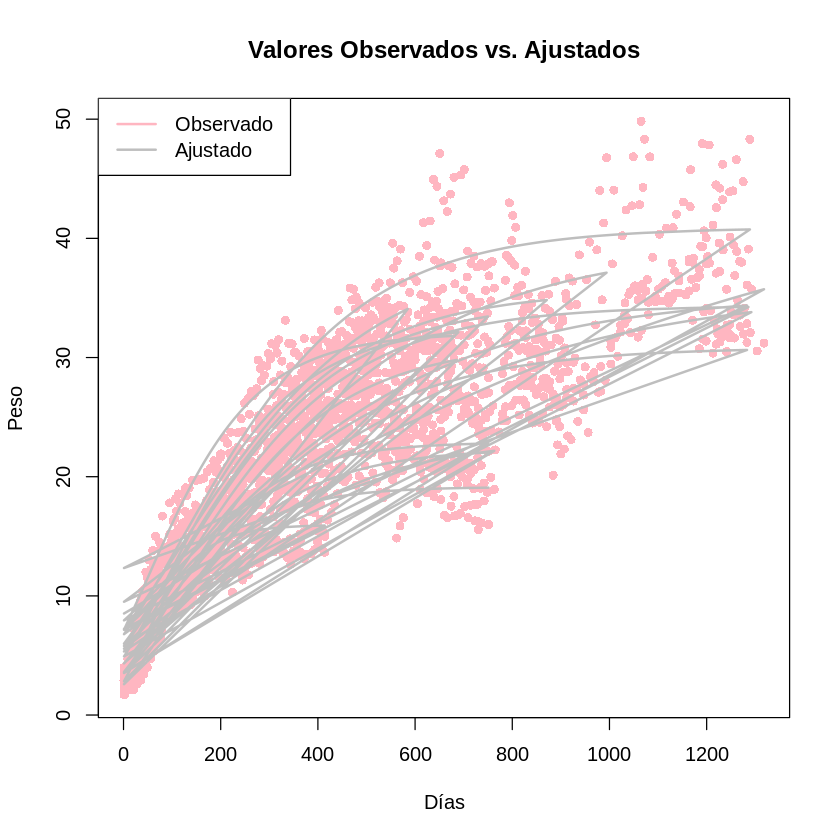

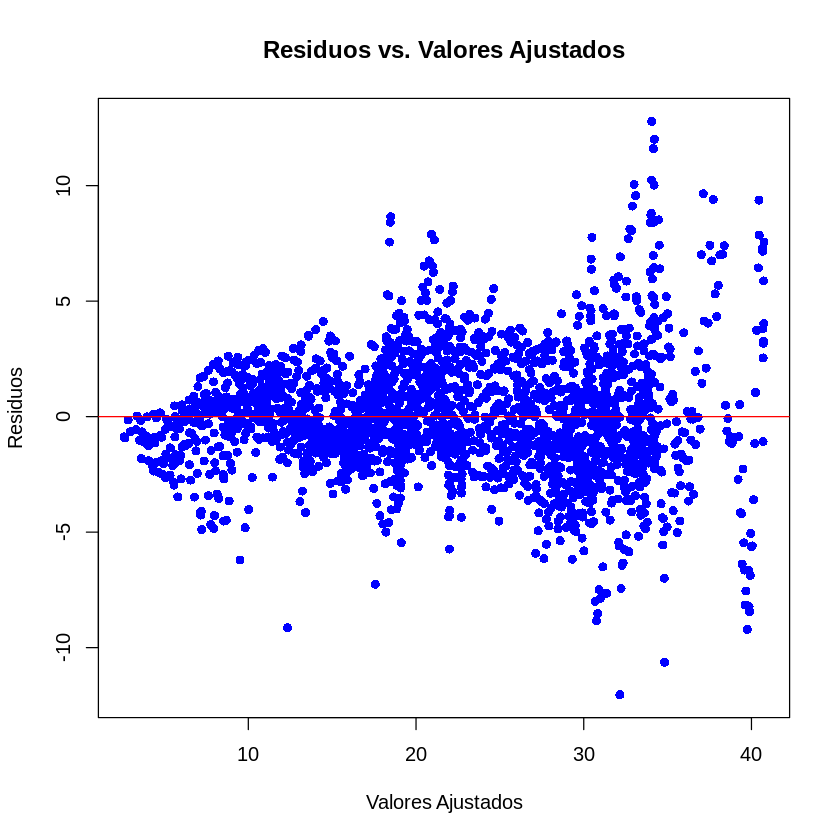

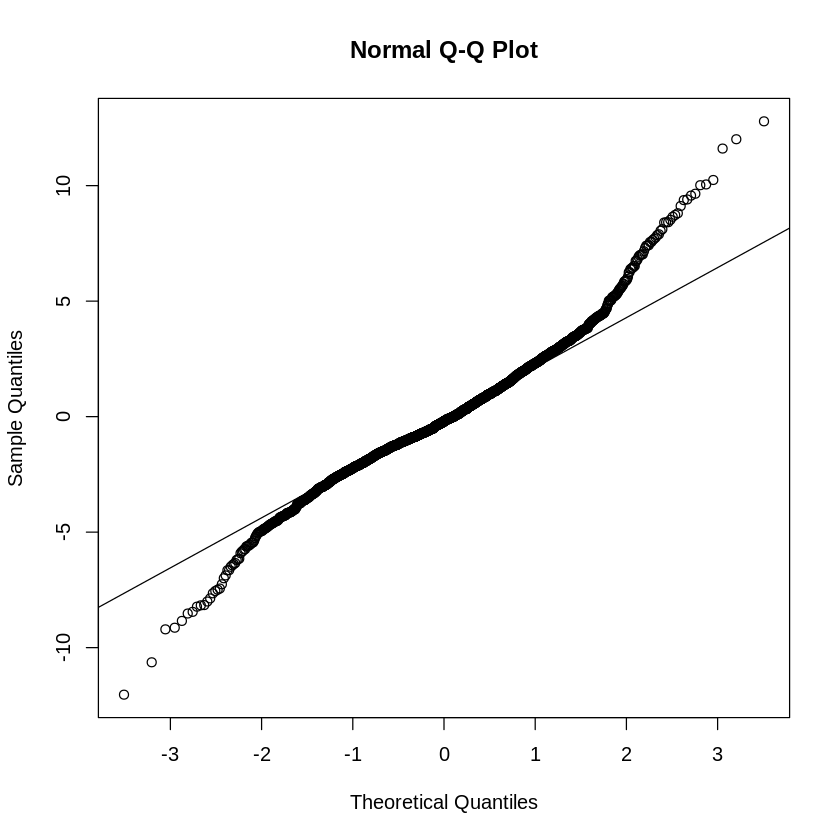

In [ ]:
# Gráfico de los valores observados vs. valores ajustados
plot(gd$dias, gd$peso, pch = 16, col = "light pink", main = "Valores Observados vs. Ajustados", xlab = "Días", ylab = "Peso")
lines(gd$dias, fitted(Gompertz), col = "grey", lwd = 2)
legend("topleft", legend = c("Observado", "Ajustado"), col = c("light pink", "grey"), lty = 1, lwd = 2)

# Gráfico de residuos vs. valores ajustados
plot(fitted(Gompertz), residuals, pch = 16, col = "blue", main = "Residuos vs. Valores Ajustados", xlab = "Valores Ajustados", ylab = "Residuos")
abline(h = 0, col = "red")

# Gráfico QQ de los residuos
qqnorm(residuals)
qqline(residuals)

Warning message in geom_hline(h = 0, color = "red", size = 1.5):
“Ignoring unknown parameters: `h`”


geom_hline: na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

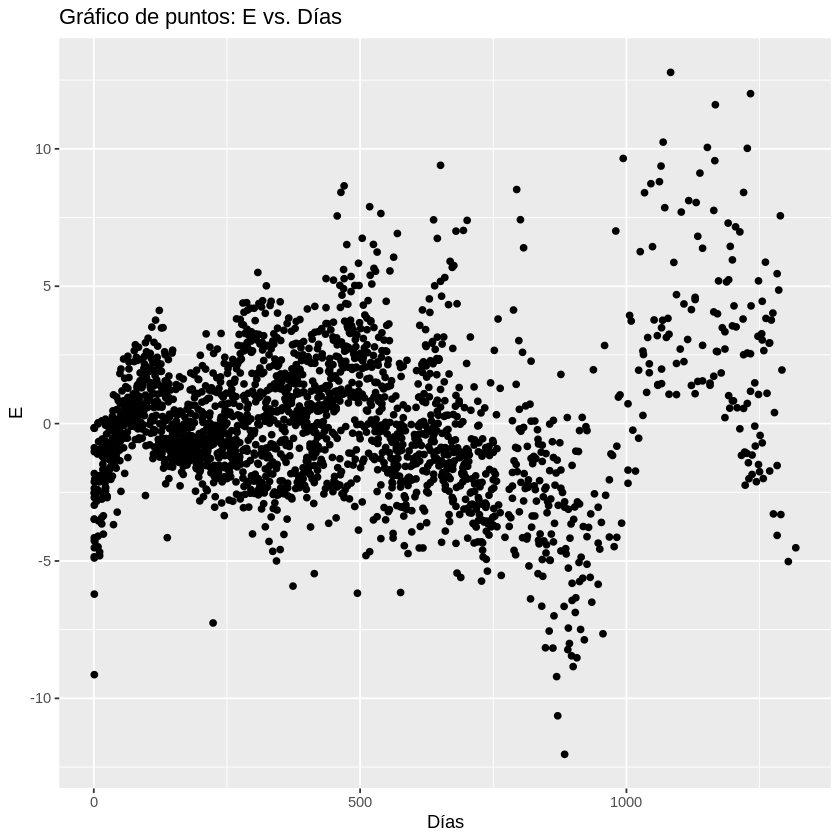

In [ ]:
library(ggplot2)
grafico_puntos <- ggplot(datos_merge, aes(x = dias, y = e)) +
                  geom_point() +  # Agregar puntos
                  labs(x = "Días", y = "E") +  # Etiquetas de ejes
                  ggtitle("Gráfico de puntos: E vs. Días")  # Título del gráfico
                  geom_hline(h=0, color = "red",size =1.5)  # Línea horizontal roja en y = 10

# Mostrar el gráfico
print(grafico_puntos)

### **Modelo Ajustado vs Curvas Individuales**

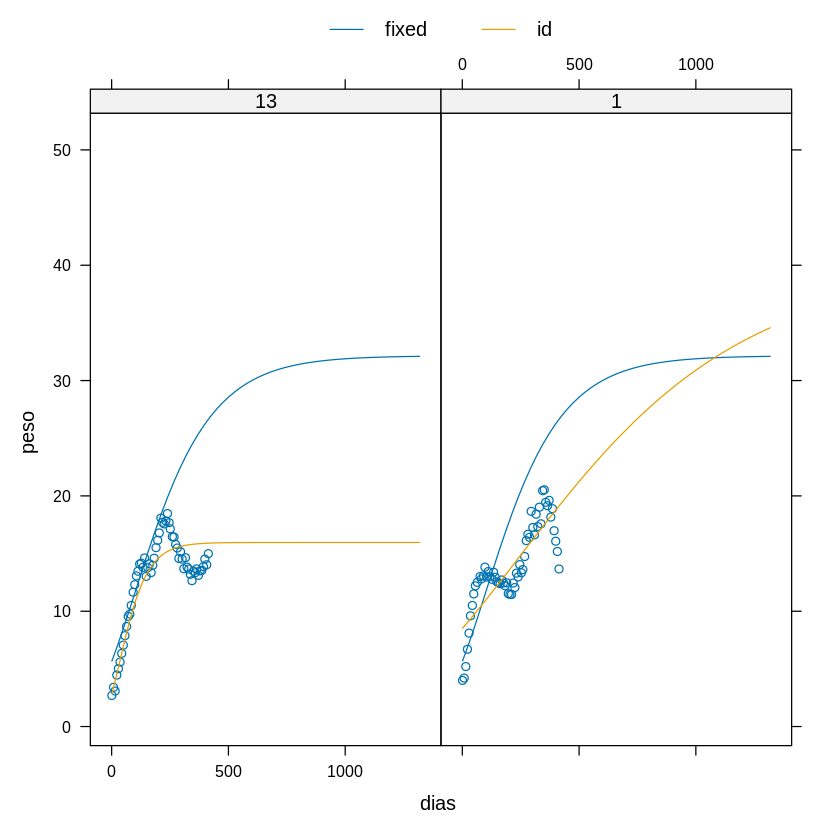

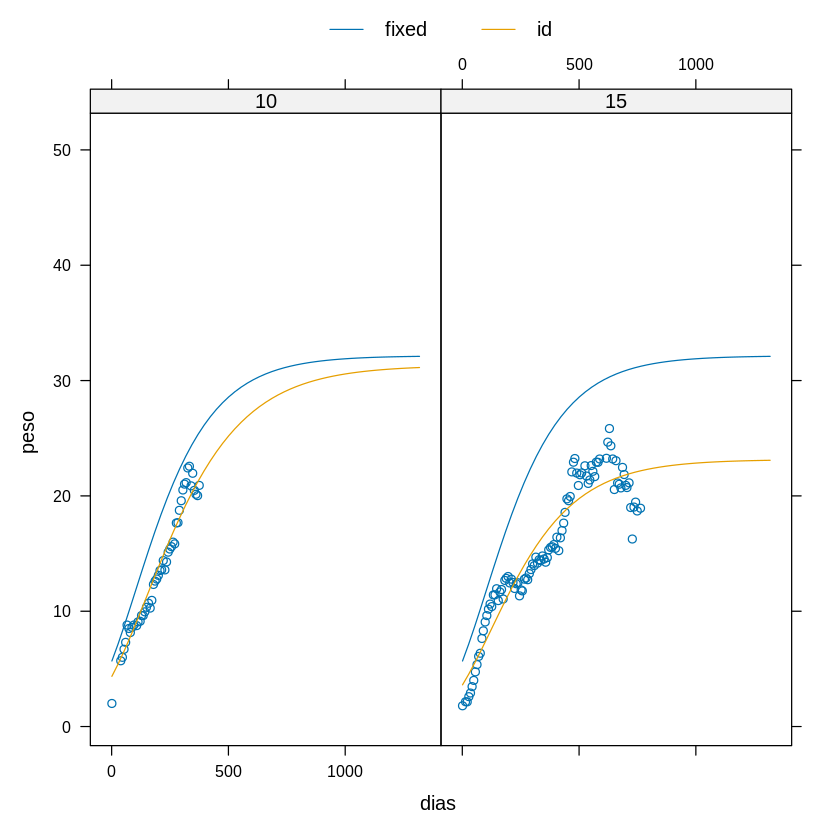

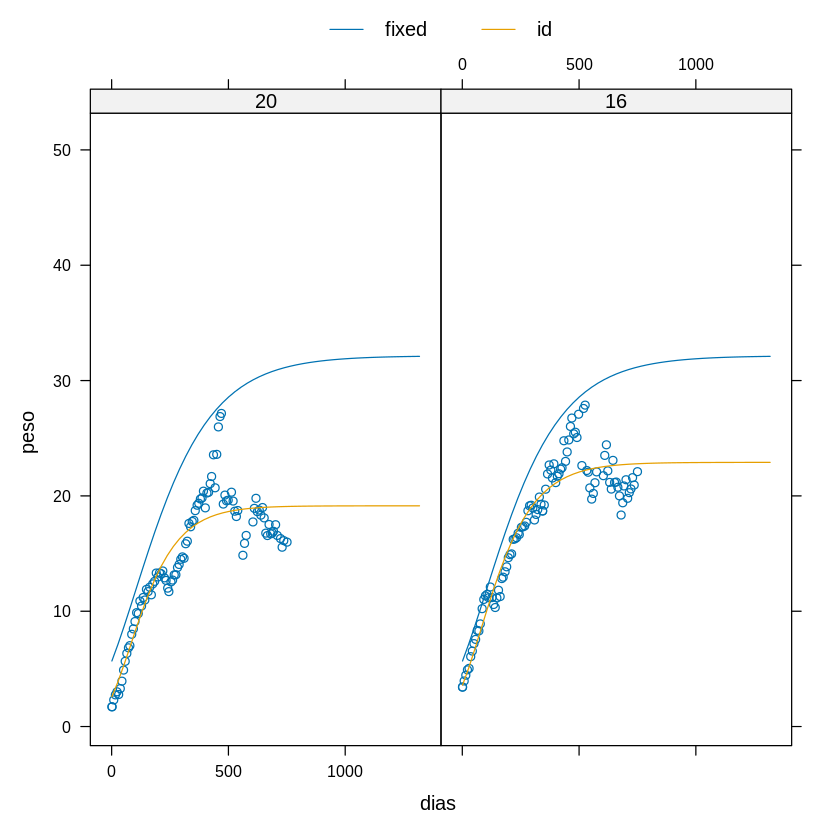

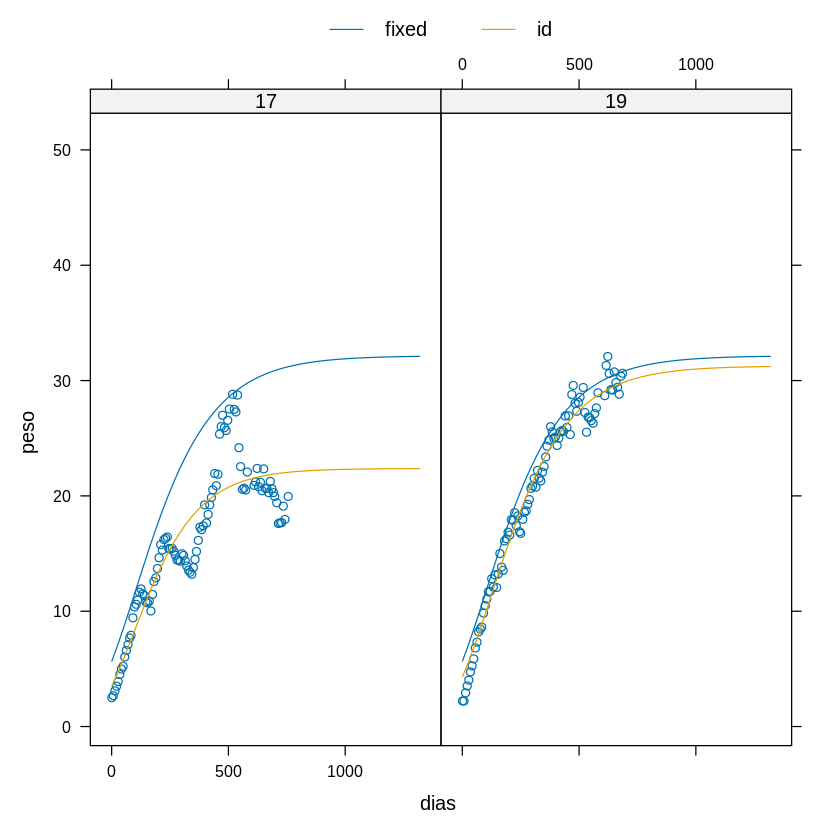

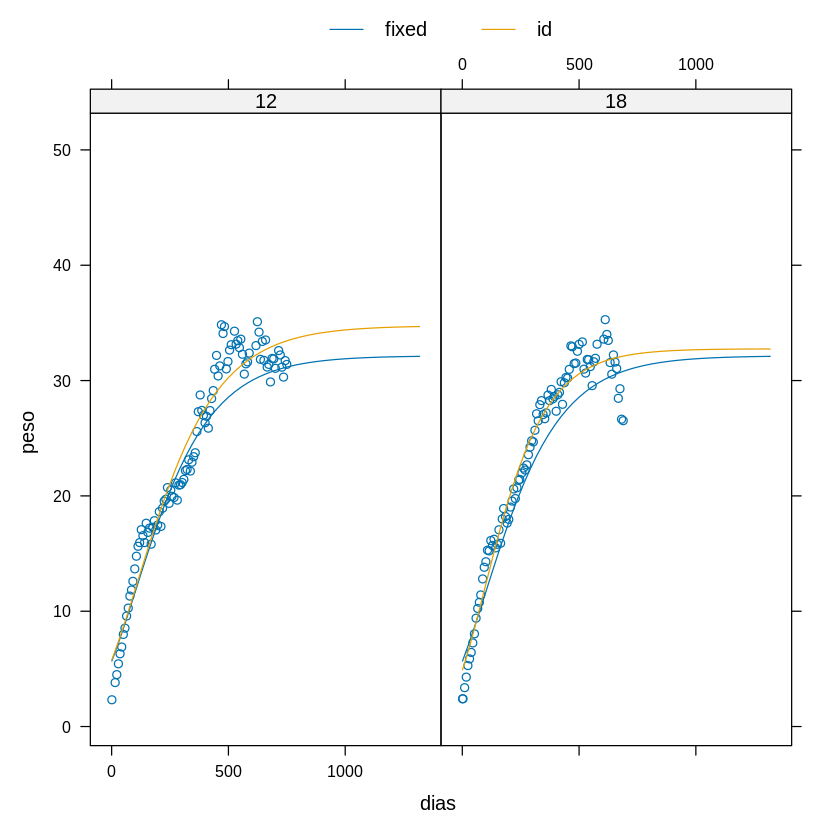

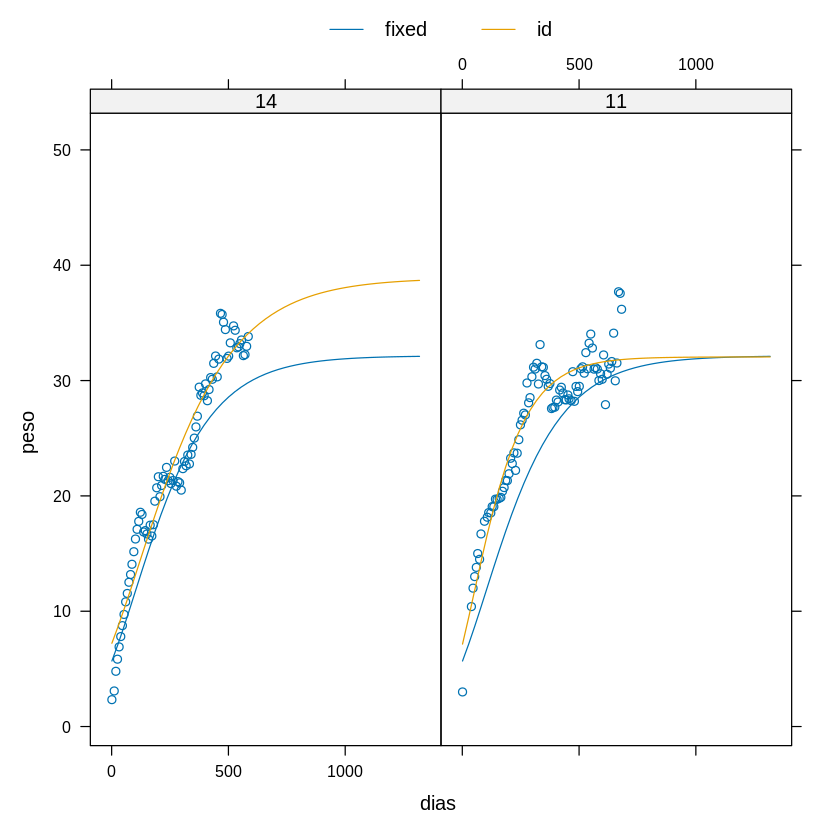

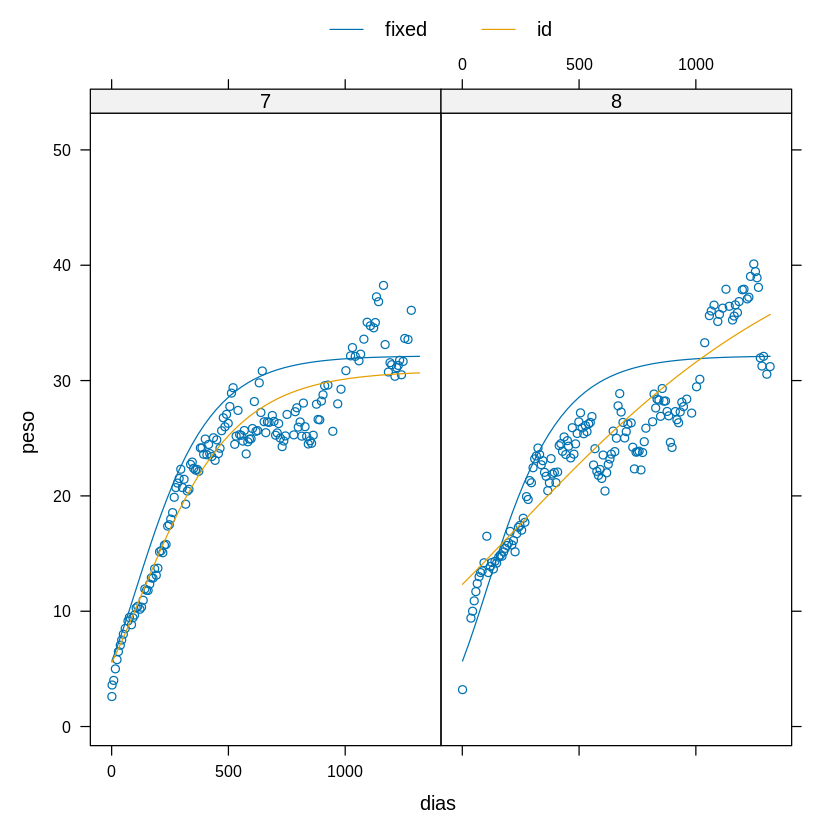

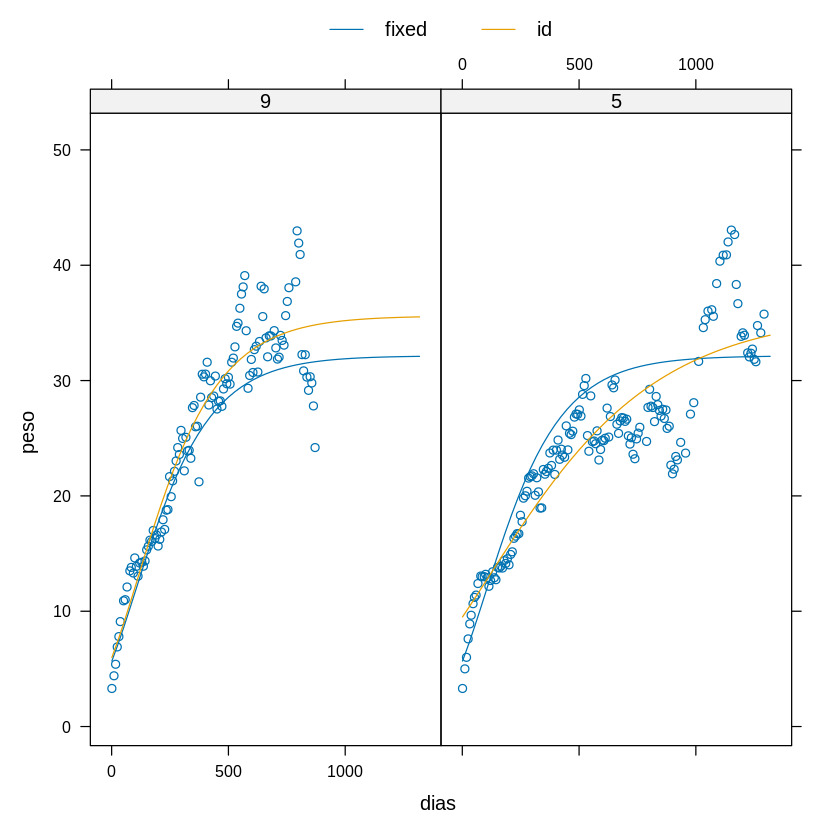

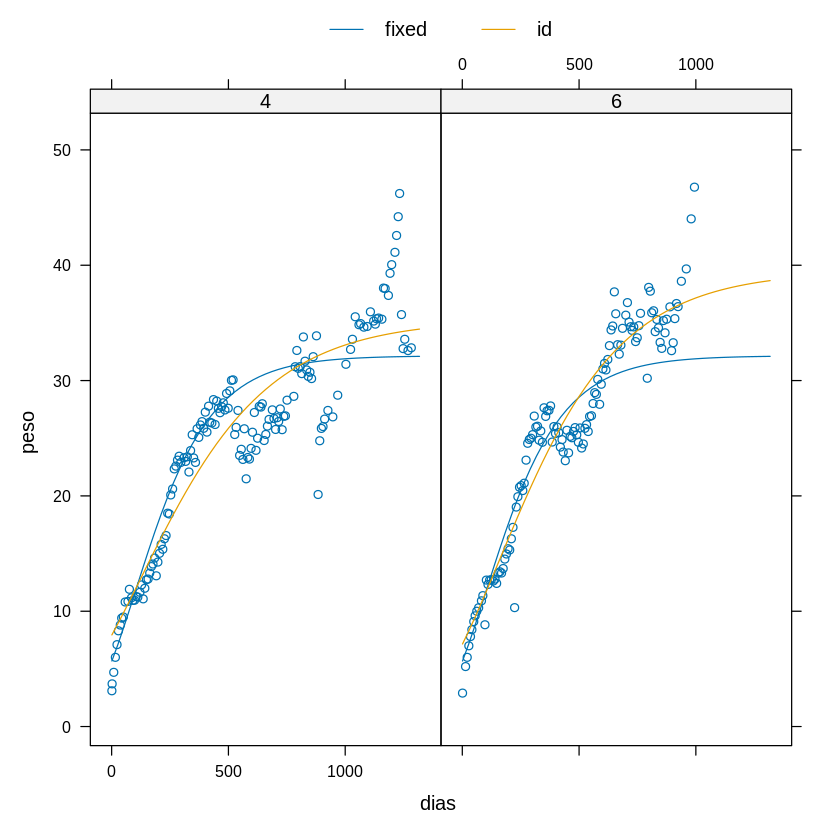

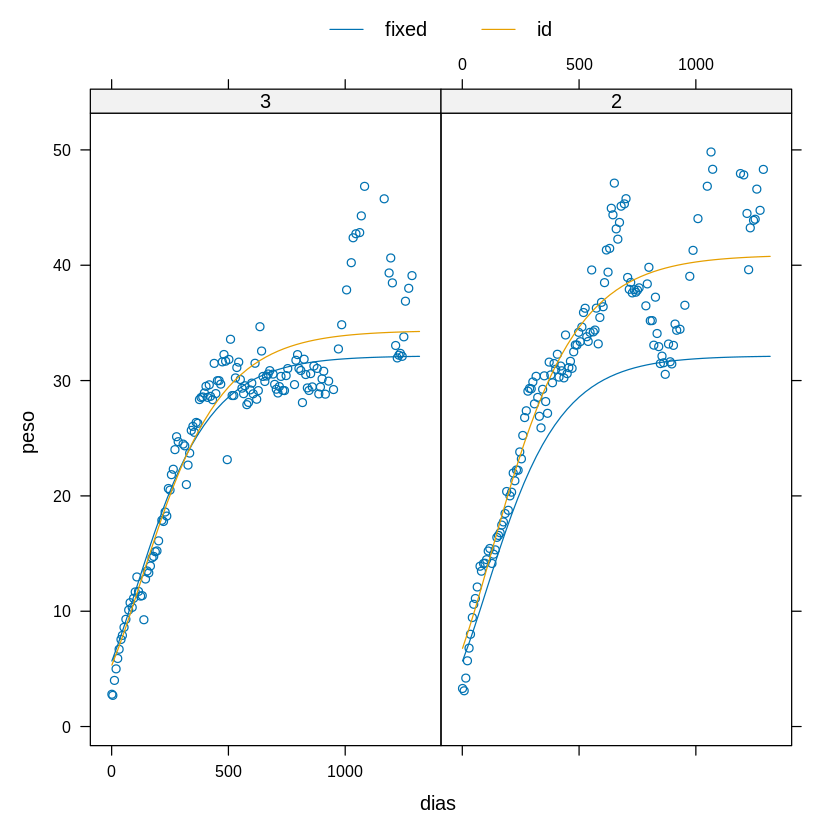

In [ ]:
plot( augPred(Gompertz, level = 0:1),layout = c(2,1) , width = 500) # p/ ver adecuación del modelo ajustado

# **Crear data frame con toda la información**

In [ ]:
# Unir dataframes (gd= datos agrupados; df2=tiene los parámetros). UNE EL DATA FRAME GD CON EL QUE TIENE LOS PARAMETROS
datos_merge=merge(gd,df2,by="id")
head(datos_merge)

,id,sx,tp,ep,a,ed,dias,peso,A,B,C
,<ord>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2,1,V,17,8d,1,4.0,40.02913,1.550025,0.001789595
2,1,2,1,V,17,8d,8,4.2,40.02913,1.550025,0.001789595
3,1,2,1,V,17,8d,15,5.2,40.02913,1.550025,0.001789595
4,1,2,1,V,17,8d,22,6.7,40.02913,1.550025,0.001789595
5,1,2,1,V,17,8d,29,8.1,40.02913,1.550025,0.001789595
6,1,2,1,V,17,8d,35,9.6,40.02913,1.550025,0.001789595


#**A PARTIR DEL MODELO SELECCIONADO**

Seleccionado el modelo que mejor ajuste los datos:
1. Se determinará la **Tasa de Crecimiento Absoluto** (TCA),
2. Se evaluará a través del procedimiento de modelos no lineales, la incidencia de los factores ambientales: año de nacimiento (Añ), época de nacimiento (E), sexo de la cría (Sx), tipo de parto (TP) y edad de la madre (Ed), sobre los parámetros estimados de la curva de crecimiento: peso adulto (A), constante de integración (B), tasa de crecimiento (K), peso en el punto de inflexión (m) y sobre la tasa de crecimiento absoluto (TCA).

**TASA DE CRECIMIENTO ABSOLUTO (TCA)**

# **Analisis de Parametros por factores**

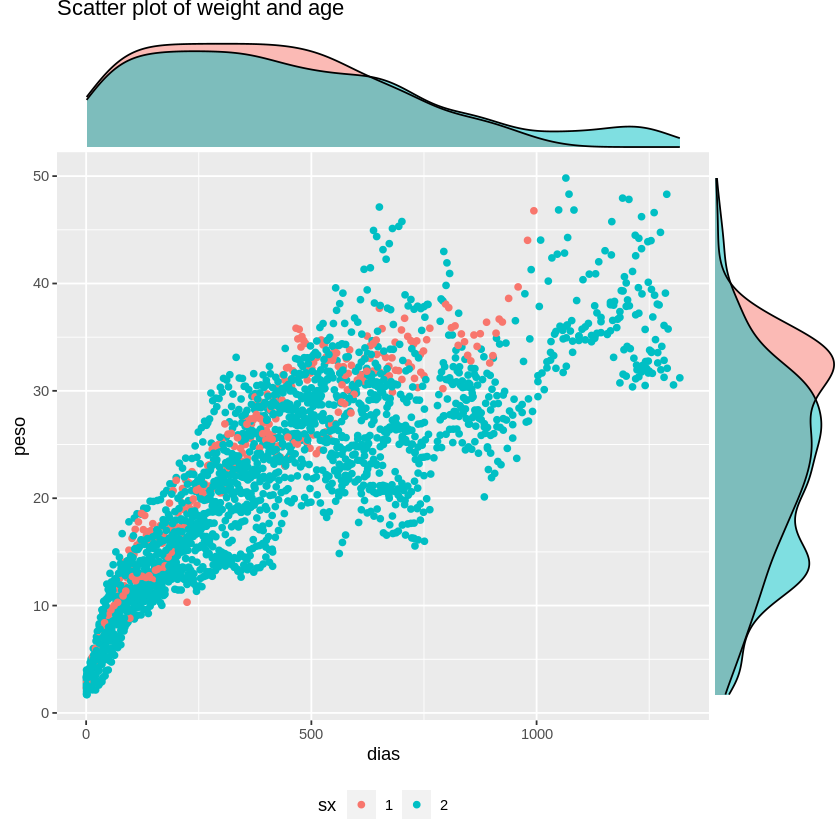

In [ ]:
# Diagrama de dispersión, coloreado por resultado
# La columna Outcome se asigna como color en ggplot. groupFill en ggMarginal se establece en TRUE
scatter_plot_color <- ggplot(data = datos_merge %>% drop_na(sx))+
  geom_point(mapping = aes(y = peso, x = dias, color = sx)) +
  labs(title = "Scatter plot of weight and age")+
  theme(legend.position = "bottom")

ggMarginal(scatter_plot_color, type = "density", groupFill = TRUE)

## **Cálculo de Peso estimado y e**

In [ ]:
# Suponiendo que tienes una data frame llamado datos_merge con columnas A, B, C, y dias

datos_merge <- datos_merge %>%
  mutate(pest = A * exp(-B * exp(-C * dias)))

datos_merge <- datos_merge %>%
  mutate(e=peso-pest)
summary(datos_merge)


       id       sx       tp       ep        a         ed            dias       
 5      : 159   1: 315   1:1028   I: 850   17:1370   8d:2220   Min.   :   1.0  
 8      : 158   2:1905   2:1192   V:1370   18: 850             1st Qu.: 200.0  
 7      : 157                                                  Median : 396.0  
 4      : 156                                                  Mean   : 445.9  
 3      : 147                                                  3rd Qu.: 638.0  
 2      : 144                                                  Max.   :1318.0  
 (Other):1299                                                                  
      peso             A               B               C           
 Min.   : 1.71   Min.   :15.96   Min.   :1.315   Min.   :0.001259  
 1st Qu.:14.98   1st Qu.:30.85   1st Qu.:1.512   1st Qu.:0.003344  
 Median :22.91   Median :34.55   Median :1.791   Median :0.004935  
 Mean   :22.39   Mean   :33.06   Mean   :1.716   Mean   :0.004978  
 3rd Qu.:29.28   3rd

In [ ]:
# Exportar archivo Excel con toda la información
write.xlsx(datos_merge, "datos_merge.xlsx")# para exportar a excel



## **PESO ESTIMADO (PARA CADA NIVEL UNICO DE DIAS)**


,dias,pest
,<int>,<dbl>
1,1,5.841518
2,2,5.408606
3,3,5.045234
4,5,5.533024
5,7,4.197961
6,8,5.803601


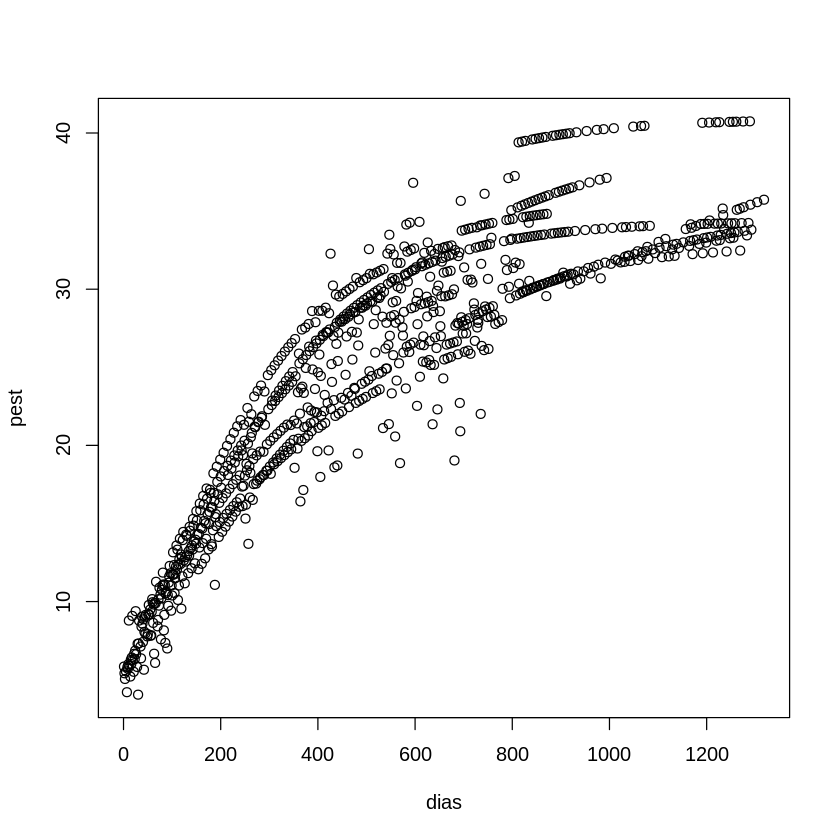

In [ ]:
# Calcular el promedio de "pest" para cada nivel único de "dias"
promedio_pest <- aggregate(pest ~ dias, data = datos_merge, FUN = mean)

# Mostrar la tabla resultante
head(promedio_pest)
plot(promedio_pest)

In [ ]:
# Redondear hacia arriba los valores al dividir "dias" por 7 y asignarlos a una nueva columna "semanas"
datos_merge$semanas <- ceiling(datos_merge$dias / 7)

# Mostrar los primeros registros del dataframe para verificar los cambios
head(datos_merge)

,id,sx,tp,ep,a,ed,dias,peso,A,B,C,pest,e,semanas
,<ord>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2,1,V,17,8d,1,4.0,40.02913,1.550025,0.001789595,8.519469,-4.5194695,1
2,1,2,1,V,17,8d,8,4.2,40.02913,1.550025,0.001789595,8.685160,-4.4851604,2
3,1,2,1,V,17,8d,15,5.2,40.02913,1.550025,0.001789595,8.851951,-3.6519509,3
4,1,2,1,V,17,8d,22,6.7,40.02913,1.550025,0.001789595,9.019808,-2.3198083,4
5,1,2,1,V,17,8d,29,8.1,40.02913,1.550025,0.001789595,9.188700,-1.0886996,5
6,1,2,1,V,17,8d,35,9.6,40.02913,1.550025,0.001789595,9.334261,0.2657385,5




> PARA QUE ES ESTE GRAFICO



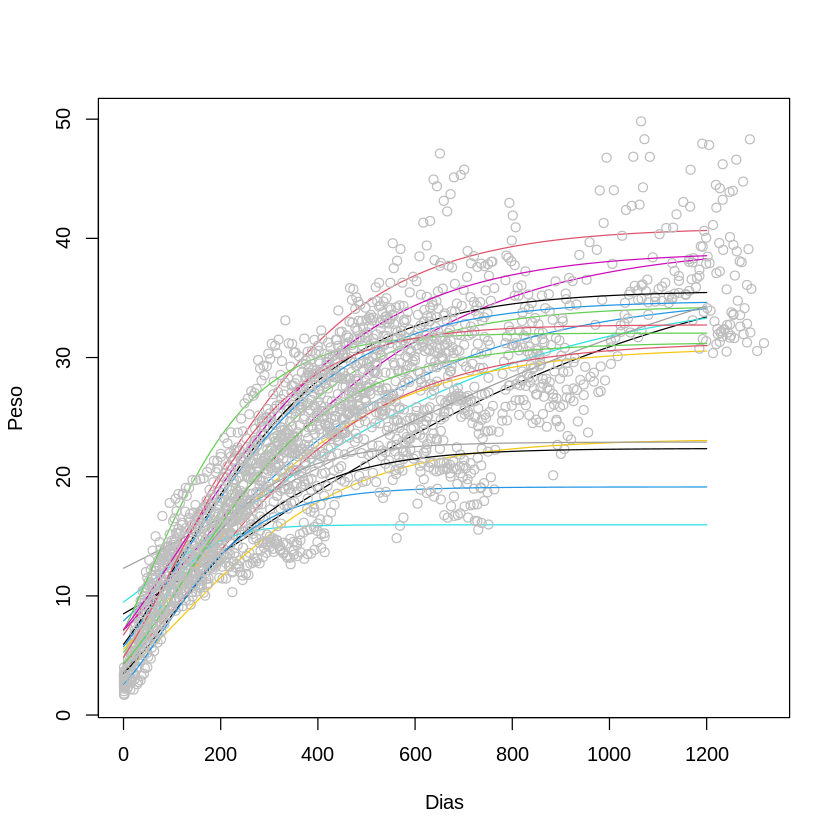

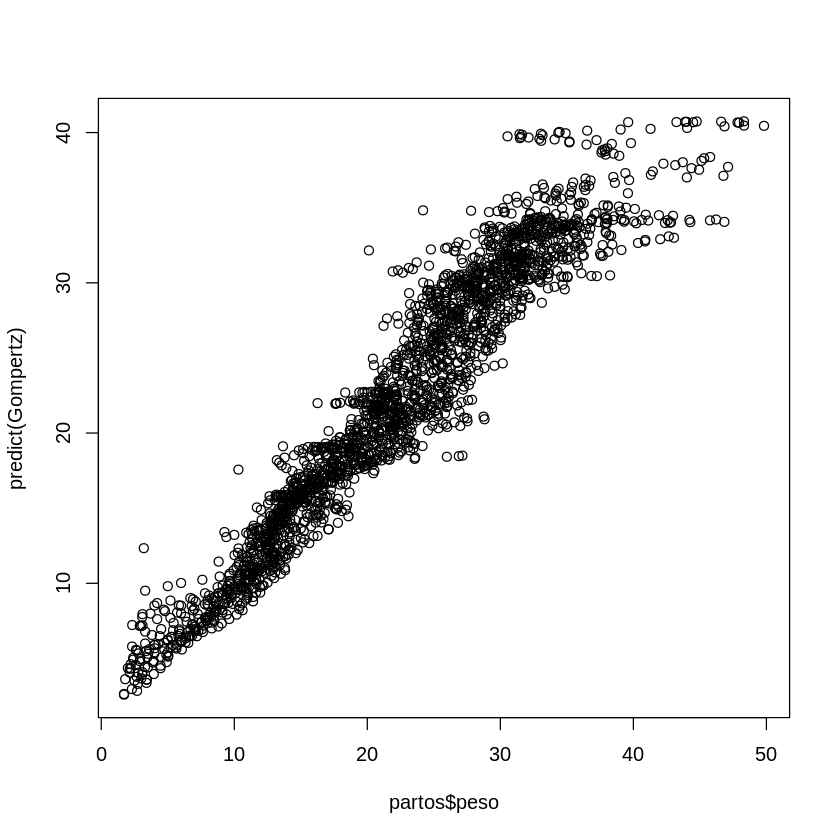

In [ ]:
plot(partos$dias, partos$peso, type = "n", xlab = "Dias", ylab = "Peso")
#plot(partos$dias, partos$peso, type = "n", xlab = "Dias", ylab = "Peso", xlim = c(min(partos$dias), max(partos$dias)))
# Crear y asignar valores a tt
# Crear y asignar valores a tt
#tt <- seq(min(partos$dias), max(partos$dias), length.out = 1200)


for(i in 1:n) {
  yp = (Af + ABCr[i,1]) * exp(- (Bf + ABCr[i,2]) * exp(- (Cf + ABCr[i,3])  * pseudodias))
  lines(pseudodias, yp, col = as.numeric(row.names(ABCr))[i])
  # lines(tt, yp, col = ifelse(individuos$epoca[i] == "V", "green", "magenta"))
  whichid <- as.numeric(row.names(ABCr))[i]
  points(partos$dias[partos$id == whichid], partos$peso[partos$id == whichid], col = "gray")
}

plot(partos$peso, predict(Gompertz))
#lines(pseudodias, predict(Gompertz, newdata = list(dias = pseudodias, id = 6)), lwd = 3)

❤     **modelamos la heterocedasticidad???????????**

In [ ]:
# para modelar la heterocedasticadad en Gompertz
library(nlme)

# Definir el modelo Gompertz
modelo_gompertz <- nlme(peso ~ A * exp(-B * exp(-C * dias)),
                        fixed = A + B + C ~ 1,
                        random = A + B + C ~ 1 | id,
                        data = gd,
                        start = c(A = 50, B = 4, C = 0.06),
                        na.action = na.exclude)

# Ajustar un modelo VarIdent para modelar la heterocedasticidad
modelo_hetero <- update(modelo_gompertz, weights = varIdent(form = ~ 1 | dias))

# Ajustar el modelo VarIdent
ajuste_hetero <- nlme:::VarIdent(object = modelo_hetero)

# Resumen del ajuste
summary(ajuste_hetero)

# **FIN 💪** ##

# **Curva Logistico** con tres parametros



In [ ]:
logistico <- function(x, a = 50, b = 4, c = 0.06) {
               a/(1 + b*exp(-c*x))
            }
x <- seq(0, 365*3)
y <- logistico(x)
plot(x, y, type = "l")

In [ ]:
# formulas
a/(1 + b * exp(-c * x))    # logistico de 3 parametros
a * exp(-b * exp(-c * x))  # gompertz
a * (1-b*exp(-c*x))          # brody
a/(1 - b * exp(-c * x))      # richards
a * (1-b*exp(-c*x))^3          # von bertalanffy

In [ ]:
GompertzLog = nlme(peso ~ A /(1+ B * exp(-C * dias)),
           fixed = c(A ~ 1, B ~ 1, C ~ 1),
           random = A + B + C ~ 1, #otra forma de notarlo
           data = gd,
           start = c(A = 50, B = 4, C = 0.06), # Valores iniciales para los parámetros
           na.action = na.exclude) # Tratamiento de datos faltantes
print(GompertzLog)

In [ ]:
GompertzLog$coeff$random

AfL <- GompertzLog$coeff$fixed[1]
BfL <- GompertzLog$coeff$fixed[2]
CfL <- GompertzLog$coeff$fixed[3]

In [ ]:
ABCr <- GompertzLog$coeff$random$id
ABCr <- ABCr[order(as.numeric(row.names(ABCr))),,drop = F]
n <- nrow(ABCr)

pseudodias <- seq(0, 1200)

In [ ]:
plot(partos$dias, partos$peso, type = "n", xlab = "Dias", ylab = "Peso")
#plot(partos$dias, partos$peso, type = "n", xlab = "Dias", ylab = "Peso", xlim = c(min(partos$dias), max(partos$dias)))
# Crear y asignar valores a tt
# Crear y asignar valores a tt
#tt <- seq(min(partos$dias), max(partos$dias), length.out = 1200)


for(i in 1:n) {
  yp = (AfL + ABCr[i,1]) * exp(- (BfL + ABCr[i,2]) * exp(- (CfL + ABCr[i,3])  * pseudodias))
  lines(pseudodias, yp, col = as.numeric(row.names(ABCr))[i])
  # lines(tt, yp, col = ifelse(individuos$epoca[i] == "V", "green", "magenta"))
  whichid <- as.numeric(row.names(ABCr))[i]
  points(partos$dias[partos$id == whichid], partos$peso[partos$id == whichid], col = "gray")
}

plot(partos$peso, predict(GompertzLog))
#lines(pseudodias, predict(Gompertz, newdata = list(dias = pseudodias, id = 6)), lwd = 3)

# **Curva Brody**


In [ ]:
brody <- function(x, a = 50, b = 4, c = 0.06) {
               a*(1-b*exp(-c*x))
            }
x <- seq(0, 365*3)
y <- brody(x)
plot(x, y, type = "l")

In [ ]:
GompertzBro = nlme(peso ~ A *(1- B * exp(-C * dias)),
           fixed = c(A ~ 1, B ~ 1, C ~ 1),
           random = A + B + C ~ 1, #otra forma de notarlo
           data = gd,
           start = c(A = 50, B = 4, C = 0.06), # Valores iniciales para los parámetros
           na.action = na.exclude) # Tratamiento de datos faltantes
print(GompertzBro)

In [ ]:
GompertzBro$coeff$random

AfB <- GompertzBro$coeff$fixed[1]
BfB <- GompertzBro$coeff$fixed[2]
CfB <- GompertzBro$coeff$fixed[3]

In [ ]:
ABCr <- GompertzBro$coeff$random$id
ABCr <- ABCr[order(as.numeric(row.names(ABCr))),,drop = F]
n <- nrow(ABCr)

pseudodias <- seq(0, 1200)

In [ ]:
plot(partos$dias, partos$peso, type = "n", xlab = "Dias", ylab = "Peso")
#plot(partos$dias, partos$peso, type = "n", xlab = "Dias", ylab = "Peso", xlim = c(min(partos$dias), max(partos$dias)))
# Crear y asignar valores a tt
# Crear y asignar valores a tt
#tt <- seq(min(partos$dias), max(partos$dias), length.out = 1200)


for(i in 1:n) {
  yp = (AfB + ABCr[i,1]) * exp(- (BfB + ABCr[i,2]) * exp(- (CfB + ABCr[i,3])  * pseudodias))
  lines(pseudodias, yp, col = as.numeric(row.names(ABCr))[i])
  # lines(tt, yp, col = ifelse(individuos$epoca[i] == "V", "green", "magenta"))
  whichid <- as.numeric(row.names(ABCr))[i]
  points(partos$dias[partos$id == whichid], partos$peso[partos$id == whichid], col = "gray")
}

plot(partos$peso, predict(GompertzBro))
#lines(pseudodias, predict(Gompertz, newdata = list(dias = pseudodias, id = 6)), lwd = 3)

# **Curva Richards**

In [ ]:
Richards <- function(x, a = 50, b = 4, c = 0.06) {
               a/(1 - b*exp(-c*x))
            }
x <- seq(0, 365*3)
y <- Richards(x)
plot(x, y, type = "l")

In [ ]:
# para que corra cambie los parametros iniciadores. A de 50 a 30 y B de 4 a 2.
GompertzRi = nlme(peso ~ A /(1- B * exp(-C * dias)),
           fixed = c(A ~ 1, B ~ 1, C ~ 1),
           random = A + B + C ~ 1, #otra forma de notarlo
           data = gd,
           start = c(A = 30, B = 2, C =0.06), # Valores iniciales para los parámetros
           na.action = na.exclude) # Tratamiento de datos faltantes
print(GompertzRi)

In [ ]:
GompertzRi$coeff$random

AfR <- GompertzRi$coeff$fixed[1]
BfR <- GompertzRi$coeff$fixed[2]
CfR <- GompertzRi$coeff$fixed[3]

In [ ]:
ABCr <- GompertzRi$coeff$random$id
ABCr <- ABCr[order(as.numeric(row.names(ABCr))),,drop = F]
n <- nrow(ABCr)

pseudodias <- seq(0, 1200)

In [ ]:
plot(partos$dias, partos$peso, type = "n", xlab = "Dias", ylab = "Peso")
#plot(partos$dias, partos$peso, type = "n", xlab = "Dias", ylab = "Peso", xlim = c(min(partos$dias), max(partos$dias)))
# Crear y asignar valores a tt
# Crear y asignar valores a tt
#tt <- seq(min(partos$dias), max(partos$dias), length.out = 1200)


for(i in 1:n) {
  yp = (AfR + ABCr[i,1]) * exp(- (BfR + ABCr[i,2]) * exp(- (CfR + ABCr[i,3])  * pseudodias))
  lines(pseudodias, yp, col = as.numeric(row.names(ABCr))[i])
  # lines(tt, yp, col = ifelse(individuos$epoca[i] == "V", "green", "magenta"))
  whichid <- as.numeric(row.names(ABCr))[i]
  points(partos$dias[partos$id == whichid], partos$peso[partos$id == whichid], col = "gray")
}

plot(partos$peso, predict(GompertzRi))
#lines(pseudodias, predict(Gompertz, newdata = list(dias = pseudodias, id = 6)), lwd = 3)

# **Curva Von Bertalanffy**

In [ ]:
VonBerta <- function(x, a = 50, b = 4, c = 0.06) {
               a * (1-b*exp(-c*x))^3
            }
x <- seq(0, 365*3)
y <- VonBerta(x)
plot(x, y, type = "l")

In [ ]:
GompertzVB = nlme(peso ~ A *(1- B * exp(-C * dias))^3,
           fixed = c(A ~ 1, B ~ 1, C ~ 1),
           random = A + B + C ~ 1, #otra forma de notarlo
           data = gd,
           start = c(A = 50, B = 4, C =0.06), # Valores iniciales para los parámetros
           na.action = na.exclude) # Tratamiento de datos faltantes
print(GompertzVB)

# **Dos Santos**

In [ ]:
#siguiendo video https://www.youtube.com/watch?v=eGSVcrkd6yU
library(nlme)
partos <- read.csv("partoscsv.csv")
gd = groupedData(peso~dias | id, data = partos)
Gompertz = nlme(peso ~ A * exp(-B * exp(-C * dias)),
           fixed = c(A ~ 1, B ~ 1, C ~ 1),
           random = A + B + C ~ 1, #otra forma de notarlo
           data = gd,
           start = c(A = 50, B = 4, C = 0.06), # Valores iniciales para los parámetros
           na.action = na.exclude) # Tratamiento de datos faltantes

print(Gompertz)
Gompertz$coeff$random

Af <- Gompertz$coeff$fixed[1]
Bf <- Gompertz$coeff$fixed[2]
Cf <- Gompertz$coeff$fixed[3]

ABCr <- Gompertz$coeff$random$id
ABCr <- ABCr[order(as.numeric(row.names(ABCr))),,drop = F]
n <- nrow(ABCr)

pseudodias <- seq(0, 1200)

plot(partos$dias, partos$peso, type = "n", xlab = "Dias", ylab = "Peso")
for(i in 1:n) {
  yp = (Af + ABCr[i,1]) * exp(- (Bf + ABCr[i,2]) * exp(- (Cf + ABCr[i,3])  * pseudodias))
  lines(pseudodias, yp, col = as.numeric(row.names(ABCr))[i])
  # lines(tt, yp, col = ifelse(individuos$epoca[i] == "V", "green", "magenta"))
  whichid <- as.numeric(row.names(ABCr))[i]
  points(partos$dias[partos$id == whichid], partos$peso[partos$id == whichid], col = "gray")
}

plot(partos$peso, predict(Gompertz))

# prediccion puntual
# predict(Gompertz, newdata = list(dias = tt, id = 6))

lines(pseudodias, predict(Gompertz, newdata = list(dias = pseudodias, id = 6)), lwd = 3)